# Project Overview

## Why Life Expectancy?

Life expectancy is a critical indicator of a country's health and development status. It reflects the overall mortality level of a population and summarizes the mortality pattern that prevails across all age groups. Governments and health organizations worldwide rely on life expectancy data to inform policy decisions, allocate resources, and implement public health interventions.

The World Health Organization (WHO) collects and publishes extensive datasets on life expectancy and various health-related metrics. The availability of such data presents an opportunity to analyze and understand the factors that influence life expectancy and develop predictive models to estimate life expectancy based on various socio-economic and health indicators.

## Goals & Objectives

The primary objective of this project is to analyze the life expectancy dataset from WHO available on Kaggle and compare the performance of two predictive modeling approaches: Ordinary Least Squares (OLS) regression and Random Forest regression. Specifically, the project aims to:

1. Identify and analyze the key features that influence life expectancy through exploratory data analysis (EDA) and correlation analysis.
2. Develop regression models to accurately estimate life expectancy based on a range of demographic, socio-economic, and health-related features.
3. Compare the performance of the regression models using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to determine their accuracy and generalizability.
4. Determine the optimal regression model by selecting one that achieves an adjusted R-squared value exceeding 0.95, ensuring robust explanatory power and predictive accuracy for estimating life expectancy based on diverse socio-economic, demographic, and health-related features.

## Project Summary
By comparing the performance of OLS and Random Forest regression models, this project aims to contribute to the ongoing efforts to improve global health and well-being, aligned with the United Nations Sustainable Development Goals (SDGs), particularly to ensure healthy lives and promote well-being for all at all ages.

### Type of ML Algorithms Used
1. Simple Linear Ordinary Least Squares (OLS) Regression
2. Multilinear Ordinary Least Squares (OLS) Regression
3. Random Forest Classifier

### Type of ML Task
Regression modeling, predicting life expectancy based on various features.

# Data Overview

## Dataset Source
The dataset used in this project is publicly available on Kaggle and is provided by the World Health Organization (WHO). The dataset can be found on Kaggle at [https://www.kaggle.com/datasets/vikramamin/life-expectancy-who/data](https://www.kaggle.com/datasets/vikramamin/life-expectancy-who/data)

## Dataset Description
The dataset contains 22 variables and 2938 rows, covering life expectancy data of different countries from 2000 to 2015. The file size is approximately 121 KB. Each row represents a country for a particular year, and the columns include various health and socio-economic indicators such as country name, year, country status, life expectancy, adult mortality, infant deaths, alcohol consumption, expenditure on health, immunization coverage, diseases prevalence, BMI, GDP, population, and education-related features such as schooling.

## Feature Descriptions

| Feature                          | Data Type | Description                                                               |
|----------------------------------|-----------|---------------------------------------------------------------------------|
| Country                          | Object    | Country name                                                              |
| Year                             | Int64     | Year of the data                                                          |
| Status                           | Object    | Country status of developed or developing                                 |
| Life expectancy                  | Float64   | Life expectancy in years                                                  |
| Adult Mortality                  | Float64   | Probability of dying between 15 and 60 years per 1000 population          |
| Infant Deaths                    | Int64     | Number of Infant Deaths per 1000 population                               |
| Alcohol                          | Float64   | Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
| Percentage Expenditure           | Float64   | Expenditure on health as a percentage of Gross Domestic Product per capita (%) |
| Hepatitis B                      | Float64   | Hepatitis B (HepB) immunization coverage among 1-year-olds (%)            |
| Measles                          | Int64     | Number of reported measles cases per 1000 population                      |
| BMI                              | Float64   | Average Body Mass Index of the entire population                          |
| Under-Five Deaths                | Int64     | Number of under-five deaths per 1000 population                           |
| Polio                            | Float64   | Polio (Pol3) immunization coverage among 1-year-olds (%)                  |
| Total Expenditure                | Float64   | General government expenditure on health as a percentage of total government expenditure (%) |
| Diphtheria                       | Float64   | Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) |
| HIV/AIDS                         | Float64   | Deaths per 1,000 live births due to HIV/AIDS (0-4 years)                  |
| GDP                              | Float64   | Gross Domestic Product per capita (in USD)                                |
| Population                       | Float64   | Population of the country                                                 |
| Thinness 1-19 Years              | Float64   | Prevalence of thinness among children and adolescents aged 10 to 19 (%)   |
| Thinness 5-9 Years               | Float64   | Prevalence of thinness among children aged 5 to 9 (%)                     |
| Income Composition of Resources  | Float64   | Human Development Index in terms of income composition of resources (index ranging from 0 to 1) |
| Schooling                        | Float64   | Number of years of schooling                                              |




In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from jupyterthemes import jtplot
jtplot.style(theme = 'grade3', context = 'notebook', ticks = True, grid = False) 

In [3]:
# Import the data

# Read in the .csv file
df = pd.read_csv('Life_Expectancy_Data.csv')

# Make a copy of df into life_expectancy_df, allowing later visualization of data cleaning changes
life_expectancy_df = df.copy()

# Data Cleaning

## Steps & Overview

1. After importing the data, create a copy of the DataFrame so we can preserve the original dataset for reference and later visualization of data cleaning changes.
2. Display the shape and datatypes of the dataframe to understand the size and data types of the dataset, which is crucial for initial exploration and subsequent data cleaning.
3. Check for missing values per feature to guide us in deciding how to handle missing data.
4. Print the column names to check for blank spaces and strip column names to remove spaces to ensures consistency in column names by removing leading and trailing spaces.
5. Drop the 'Status' column due to object type and because it is categorical and not relevant to our analysis.
6. Drop 'Population', 'Hepatitis B', and 'GDP' columns due to a high number of nulls, which could impact the analysis.
7. Drop the 'Year' column due to irrelevance in predicting life expectancy.
8. Calculate the number of outliers for each numeric feature and print for analysis.
9. Imputing missing values using the median of each respective feature due to high number of outliers. 
10. Create summary plots to visualize the changes made during the data cleaning process. This involved plotting the distribution of each feature before and after cleaning.

In [4]:
# Display the shape of the dataframe
life_expectancy_df.shape

(2938, 21)

In [ ]:
# Display the datatypes
life_expectancy_df.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
# Check for missing values per feature
life_expectancy_df.isna().sum() 

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Print the column names to check for blank spaces
print(life_expectancy_df.columns)

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [5]:
# Strip column names to remove spaces
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()
df.columns = df.columns.str.strip()

In [6]:
# Drop the status column due to object type
life_expectancy_df.drop(columns=['Status'], inplace=True)

# Drop Population, Hepatitis B, GDP columns due to high number of nulls
life_expectancy_df.drop(columns=['Population', 'Hepatitis B', 'GDP'], inplace=True)

# Drop Year due to irrelevance
life_expectancy_df.drop(columns=['Year'], inplace=True)

In [7]:
outlier_counts = {}

# Define a function to calculate outliers using IQR method
def find_outliers_iqr(feature):
    Q1 = life_expectancy_df[feature].quantile(0.25)
    Q3 = life_expectancy_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = life_expectancy_df[(life_expectancy_df[feature] < lower_bound) | (life_expectancy_df[feature] > upper_bound)][feature]
    return outliers

# Iterate through each feature to find outliers and count them
for feature in life_expectancy_df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = find_outliers_iqr(feature)
    outlier_counts[feature] = len(outliers)

# Print the count of outliers for each feature
for feature, count in outlier_counts.items():
    print(f"Number of outliers in '{feature}': {count}")

Number of outliers in 'Life expectancy': 10
Number of outliers in 'Adult Mortality': 82
Number of outliers in 'infant deaths': 315
Number of outliers in 'Alcohol': 0
Number of outliers in 'percentage expenditure': 389
Number of outliers in 'Measles': 542
Number of outliers in 'BMI': 0
Number of outliers in 'under-five deaths': 394
Number of outliers in 'Polio': 279
Number of outliers in 'Total expenditure': 32
Number of outliers in 'Diphtheria': 298
Number of outliers in 'HIV/AIDS': 542
Number of outliers in 'thinness  1-19 years': 89
Number of outliers in 'thinness 5-9 years': 96
Number of outliers in 'Income composition of resources': 130
Number of outliers in 'Schooling': 44


In [8]:
# Impute missing values using the median for numeric features
imputed_features = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 
                            'Polio', 'Total expenditure', 'Diphtheria',
                            'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources',
                            'Schooling']
for feature in imputed_features:
    median_value = life_expectancy_df[feature].median()
    life_expectancy_df[feature] = life_expectancy_df[feature].fillna(median_value)

In [9]:
life_expectancy_df.describe()

Life expectancy  Adult Mortality  infant deaths      Alcohol  \
count      2938.000000      2938.000000    2938.000000  2938.000000   
mean         69.234717       164.725664      30.303948     4.546875   
std           9.509115       124.086215     117.926501     3.921946   
min          36.300000         1.000000       0.000000     0.010000   
25%          63.200000        74.000000       0.000000     1.092500   
50%          72.100000       144.000000       3.000000     3.755000   
75%          75.600000       227.000000      22.000000     7.390000   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage expenditure        Measles          BMI  under-five deaths  \
count             2938.000000    2938.000000  2938.000000        2938.000000   
mean               738.251295    2419.592240    38.381178          42.035739   
std               1987.914858   11467.272489    19.935375         160.445548   
min                  0.000000       0.000000     1.000000           0.000000   
25%                  4.685343       0.000000    19.400000           0.000000   
50%                 64.912906      17.000000    43.500000           4.000000   
75%                441.534144     360.250000    56.100000          28.000000   
max              19479.911610  212183.000000    87.300000        2500.000000   

             Polio  Total expenditure   Diphtheria     HIV/AIDS  \
count  2938.000000        2938.000000  2938.000000  2938.000000   
mean     82.617767           5.924098    82.393125     1.742103   
std      23.367166           2.400770    23.655562     5.077785   
min       3.000000           0.370000     2.000000     0.100000   
25%      78.000000           4.370000    78.000000     0.100000   
50%      93.000000           5.755000    93.000000     0.100000   
75%      97.000000           7.330000    97.000000     0.800000   
max      99.000000          17.600000    99.000000    50.600000   

       thinness  1-19 years  thinness 5-9 years  \
count           2938.000000         2938.000000   
mean               4.821886            4.852144   
std                4.397621            4.485854   
min                0.100000            0.100000   
25%                1.600000            1.600000   
50%                3.300000            3.300000   
75%                7.100000            7.200000   
max               27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.630362    12.009837  
std                           0.205140     3.265139  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.677000    12.300000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

In [10]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2938 non-null   float64
 1   Adult Mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Measles                          2938 non-null   int64  
 6   BMI                              2938 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2938 non-null   float64
 9   Total expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   float64
 11  HIV/AIDS                         2938 non-null   float64
 12  thinness  1-19 years

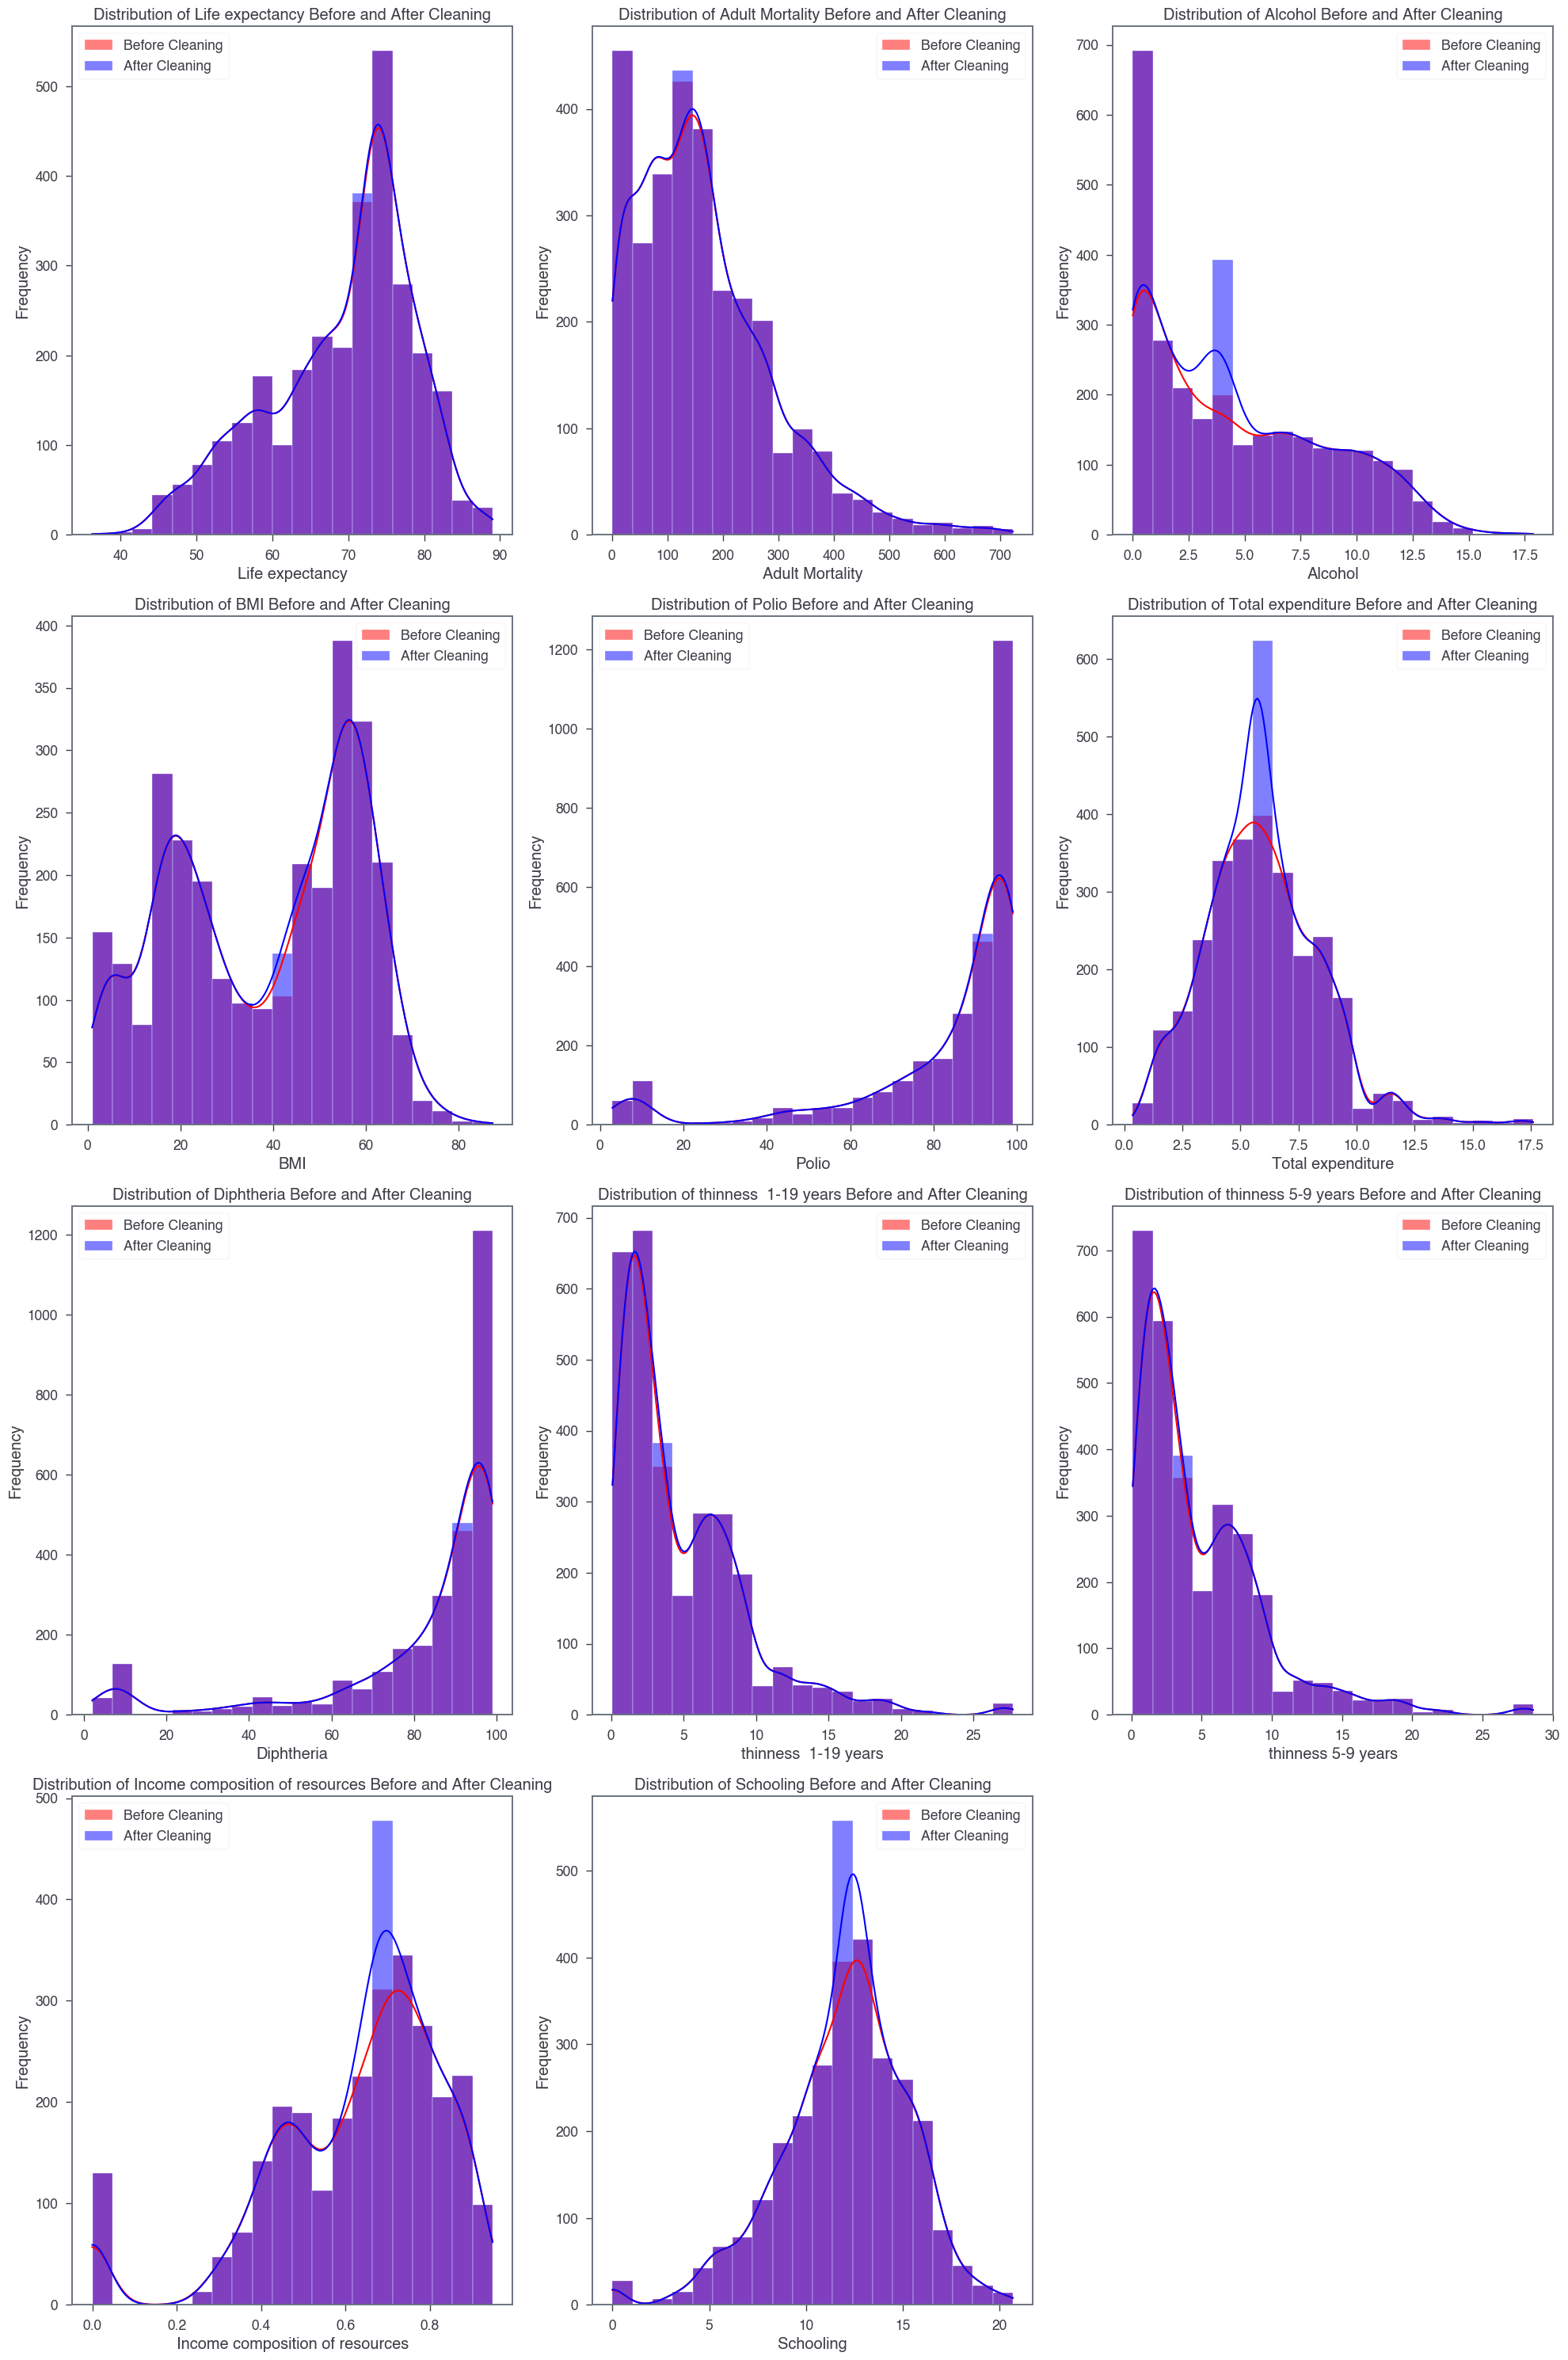

In [11]:
# Before and After Data Cleaning
imputed_columns = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'BMI', 'Polio', 
                    'Total expenditure', 'Diphtheria', 'thinness  1-19 years', 
                    'thinness 5-9 years', 'Income composition of resources', 'Schooling']

plt.figure(figsize=(20, 30))

for i, col in enumerate(imputed_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=20, kde=True, color='red', label='Before Cleaning')
    sns.histplot(life_expectancy_df[col], bins=20, kde=True, color='blue', label='After Cleaning')
    plt.title(f'Distribution of {col} Before and After Cleaning')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


## Conclusion & Disucssion
The data cleaning process involved removing irrelevant columns, dropping columns with a high number of missing values, and imputing missing values for numeric features using the median. Visualization of the distribution before and after cleaning provides a clear understanding of the transformation performed on the dataset. The cleaned dataset, life_expectancy_df, is now ready for further analysis and modeling.

# Exploratory Data Analysis (EDA)

## Summary of Techniques Employed
Exploratory Data Analysis (EDA) techniques includeded:
1. Histograms
2. Box plots
3. Heatmaps
4. Pairplots
5. Correlations

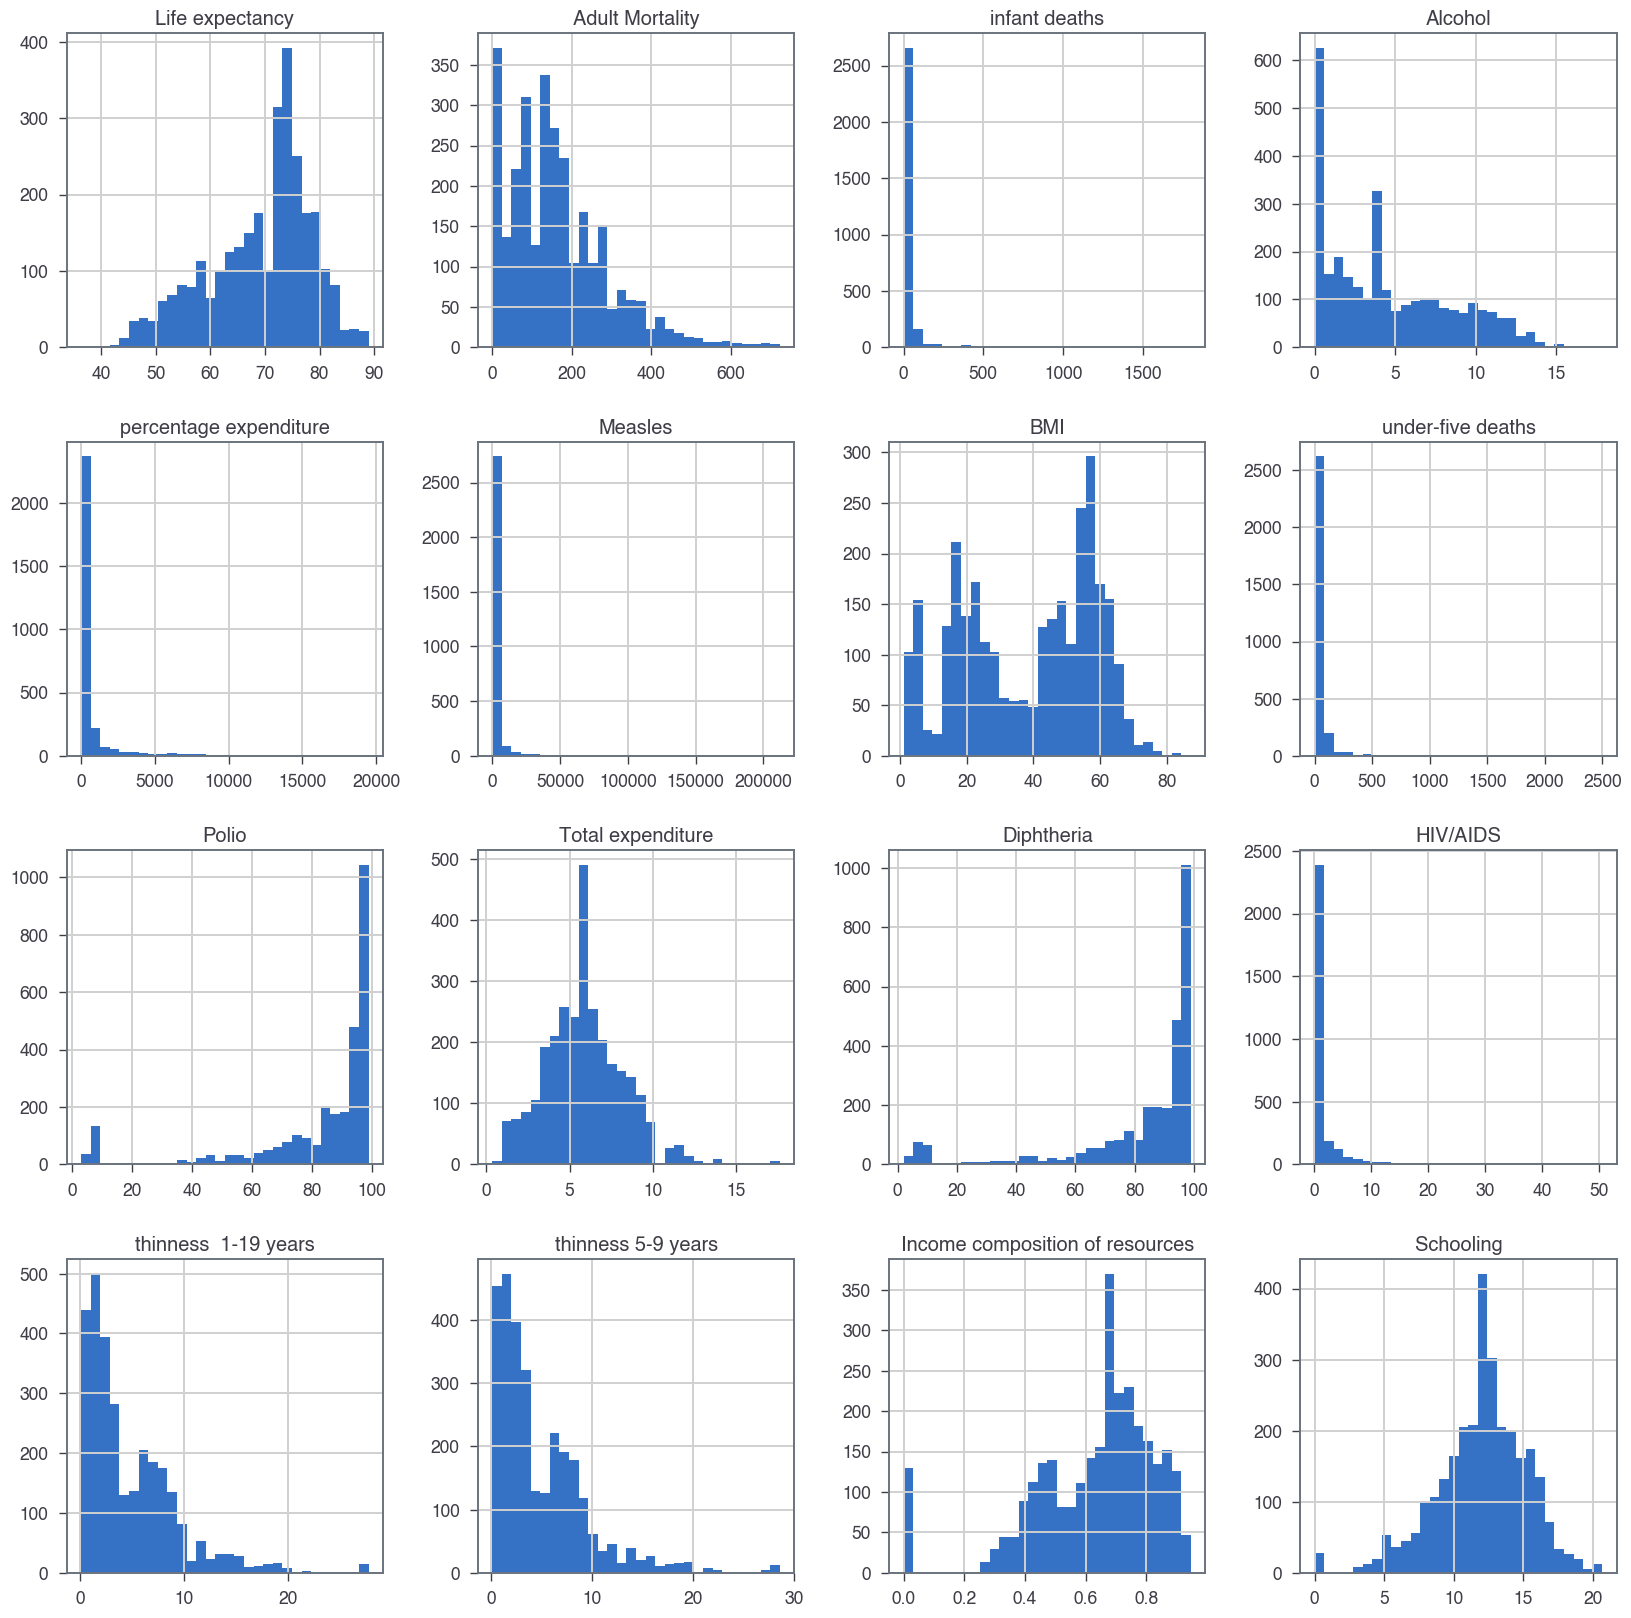

In [14]:
# Plot the histograms
life_expectancy_df.hist(bins = 30, figsize = (20, 20), color = 'b');

### Histogram Analyses
1. Life Expectancy: The majority of data points cluster around 60 to 80 years, indicating that most countries have life expectancies within this range.
2. Adult Mortality: This distribution is right-skewed, with most values below 300. This indicates that higher adult mortality rates are less common.
3. Infant Deaths: Highly right-skewed, with the majority of data points close to zero, indicating most countries have low infant death rates.
4. Alcohol: The distribution is right-skewed with most values between 0 and 10, suggesting low to moderate alcohol consumption in most countries.
5. Percentage Expenditure: Extremely right-skewed, indicating that most countries spend a low percentage on health.
6. Measles: This distribution is highly right-skewed, with most countries reporting very few cases.
7. BMI: Bimodal distribution, indicating two distinct groups of countries with differing BMI averages.
8. Under-five Deaths: Highly right-skewed, with most values near zero, indicating low child mortality rates in most countries.
9. Polio: Similar to Hepatitis B, with clusters around 0 and 100, suggesting varied vaccination rates.
10. Total Expenditure: Normally distributed with a peak around 5-10%.
11. Diphtheria: Similar to Polio and Hepatitis B, with bimodal distribution around 0 and 100.
12. HIV/AIDS: Highly right-skewed, indicating most countries have low prevalence rates.
13. Thinness 1-19 years: Right-skewed, indicating most countries have low thinness rates.
14. Thinness 5-9 years: Similar to thinness 1-19 years, with most values low.
15. Income Composition of Resources: This distribution shows a peak around 0.5 to 0.7, indicating moderate income composition.
16. Schooling: Normally distributed with a peak around 10-15 years of schooling.

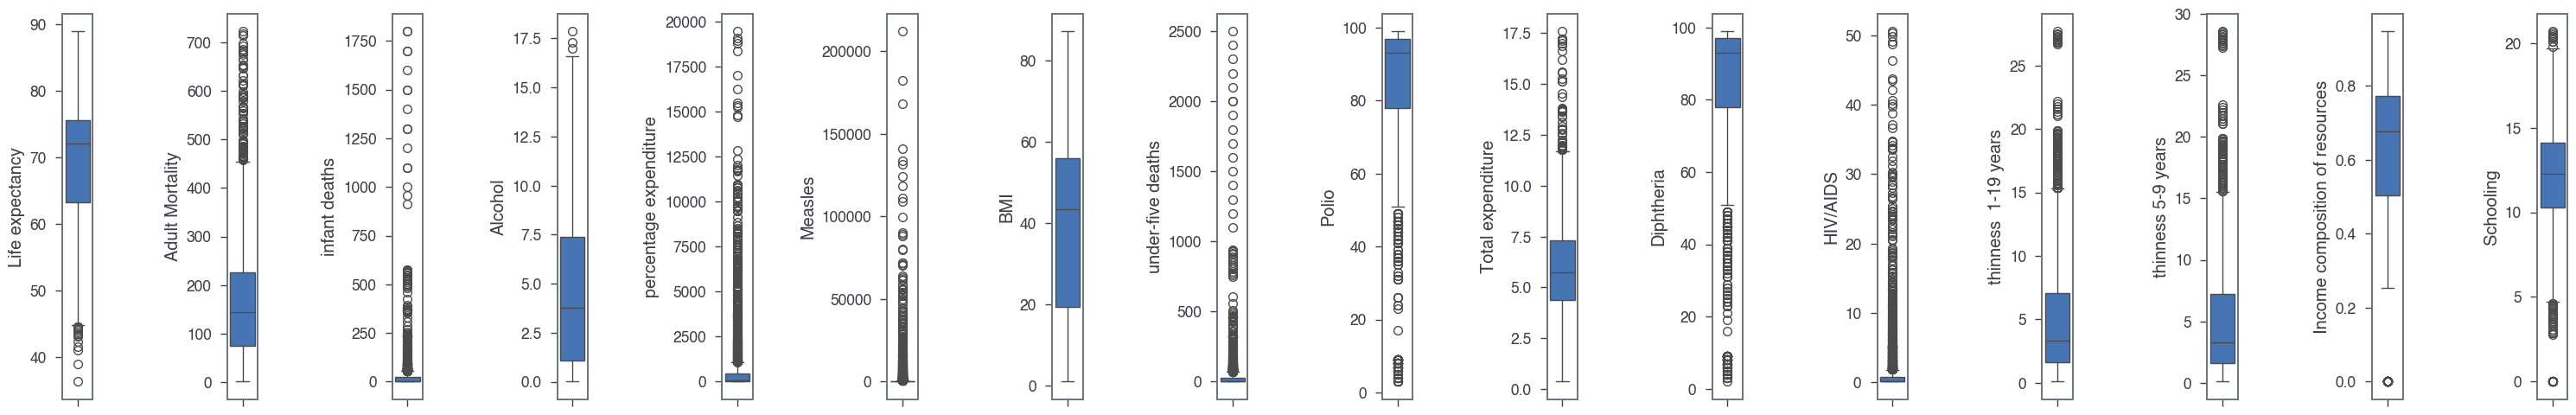

In [22]:
# Plotting boxplots for the features
plt.figure(figsize=(30, 5))
for i, feature in enumerate(life_expectancy_df.columns):
    plt.subplot(1, len(life_expectancy_df.columns), i+1)
    sns.boxplot(y=life_expectancy_df[feature], data=life_expectancy_df)
plt.tight_layout(w_pad=3.0)
plt.show()

### Box Plot Analyses

1. Life expectancy: Most values are clustered between 60 and 80, with some outliers below 40.
2. Adult Mortality: Highly skewed with many outliers, indicating variability in mortality rates.
3. Infant deaths and Under-five deaths: Skewed distributions with many high outliers, suggesting high infant and child mortality in certain regions.
4. HIV/AIDS: A skewed distribution with many outliers, indicating variability in HIV/AIDS prevalence across regions.
5. Schooling: Most values are between 10 and 15 years, with some outliers indicating areas with extremely low schooling years.
6. Income composition of resources: Generally high, but with notable lower outliers.

<Axes: >

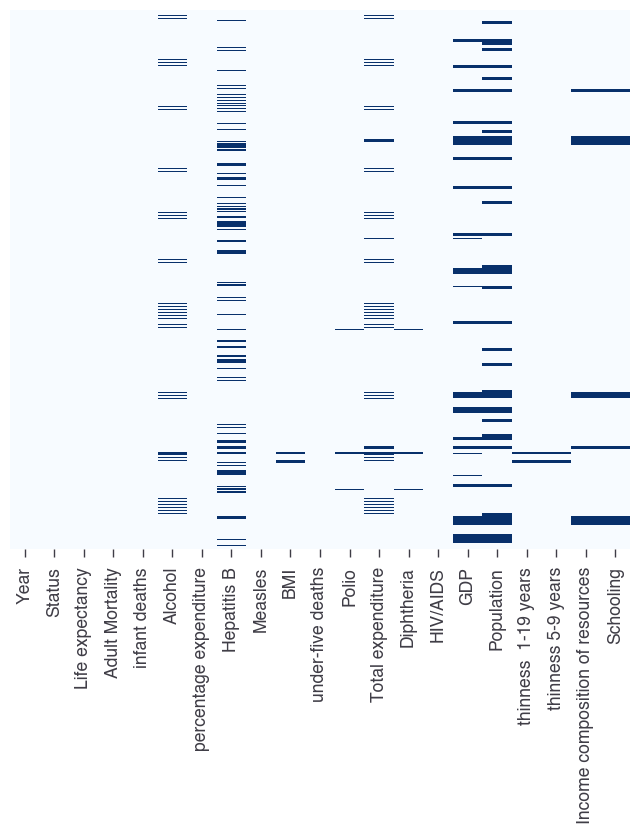

In [24]:
# Display original null values prior to data cleaning
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap= "Blues")

### Heatmap Analysis: Original df 
GDP, Population, Income Composition of Resources, and Schooling had the most missing values.
Hepatitis B, Measles, Polio, Diphtheria also had significant missing data.
Other features had sporadic missing values.

<Axes: >

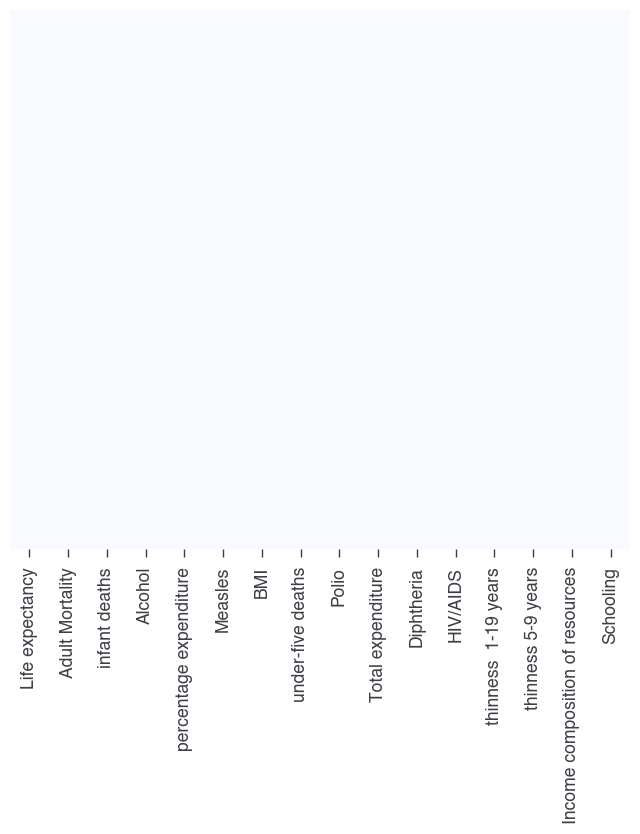

In [23]:
# Check for null values using a heatmap
sns.heatmap(life_expectancy_df.isnull(), yticklabels=False, cbar=False, cmap= "Blues")

### Heatmap Analysis: Cleaned df 
The heatmap of the cleaned df demonstrates that all nulls have been accounted for and none remain after data cleaning.

<Figure size 2000x2000 with 0 Axes>

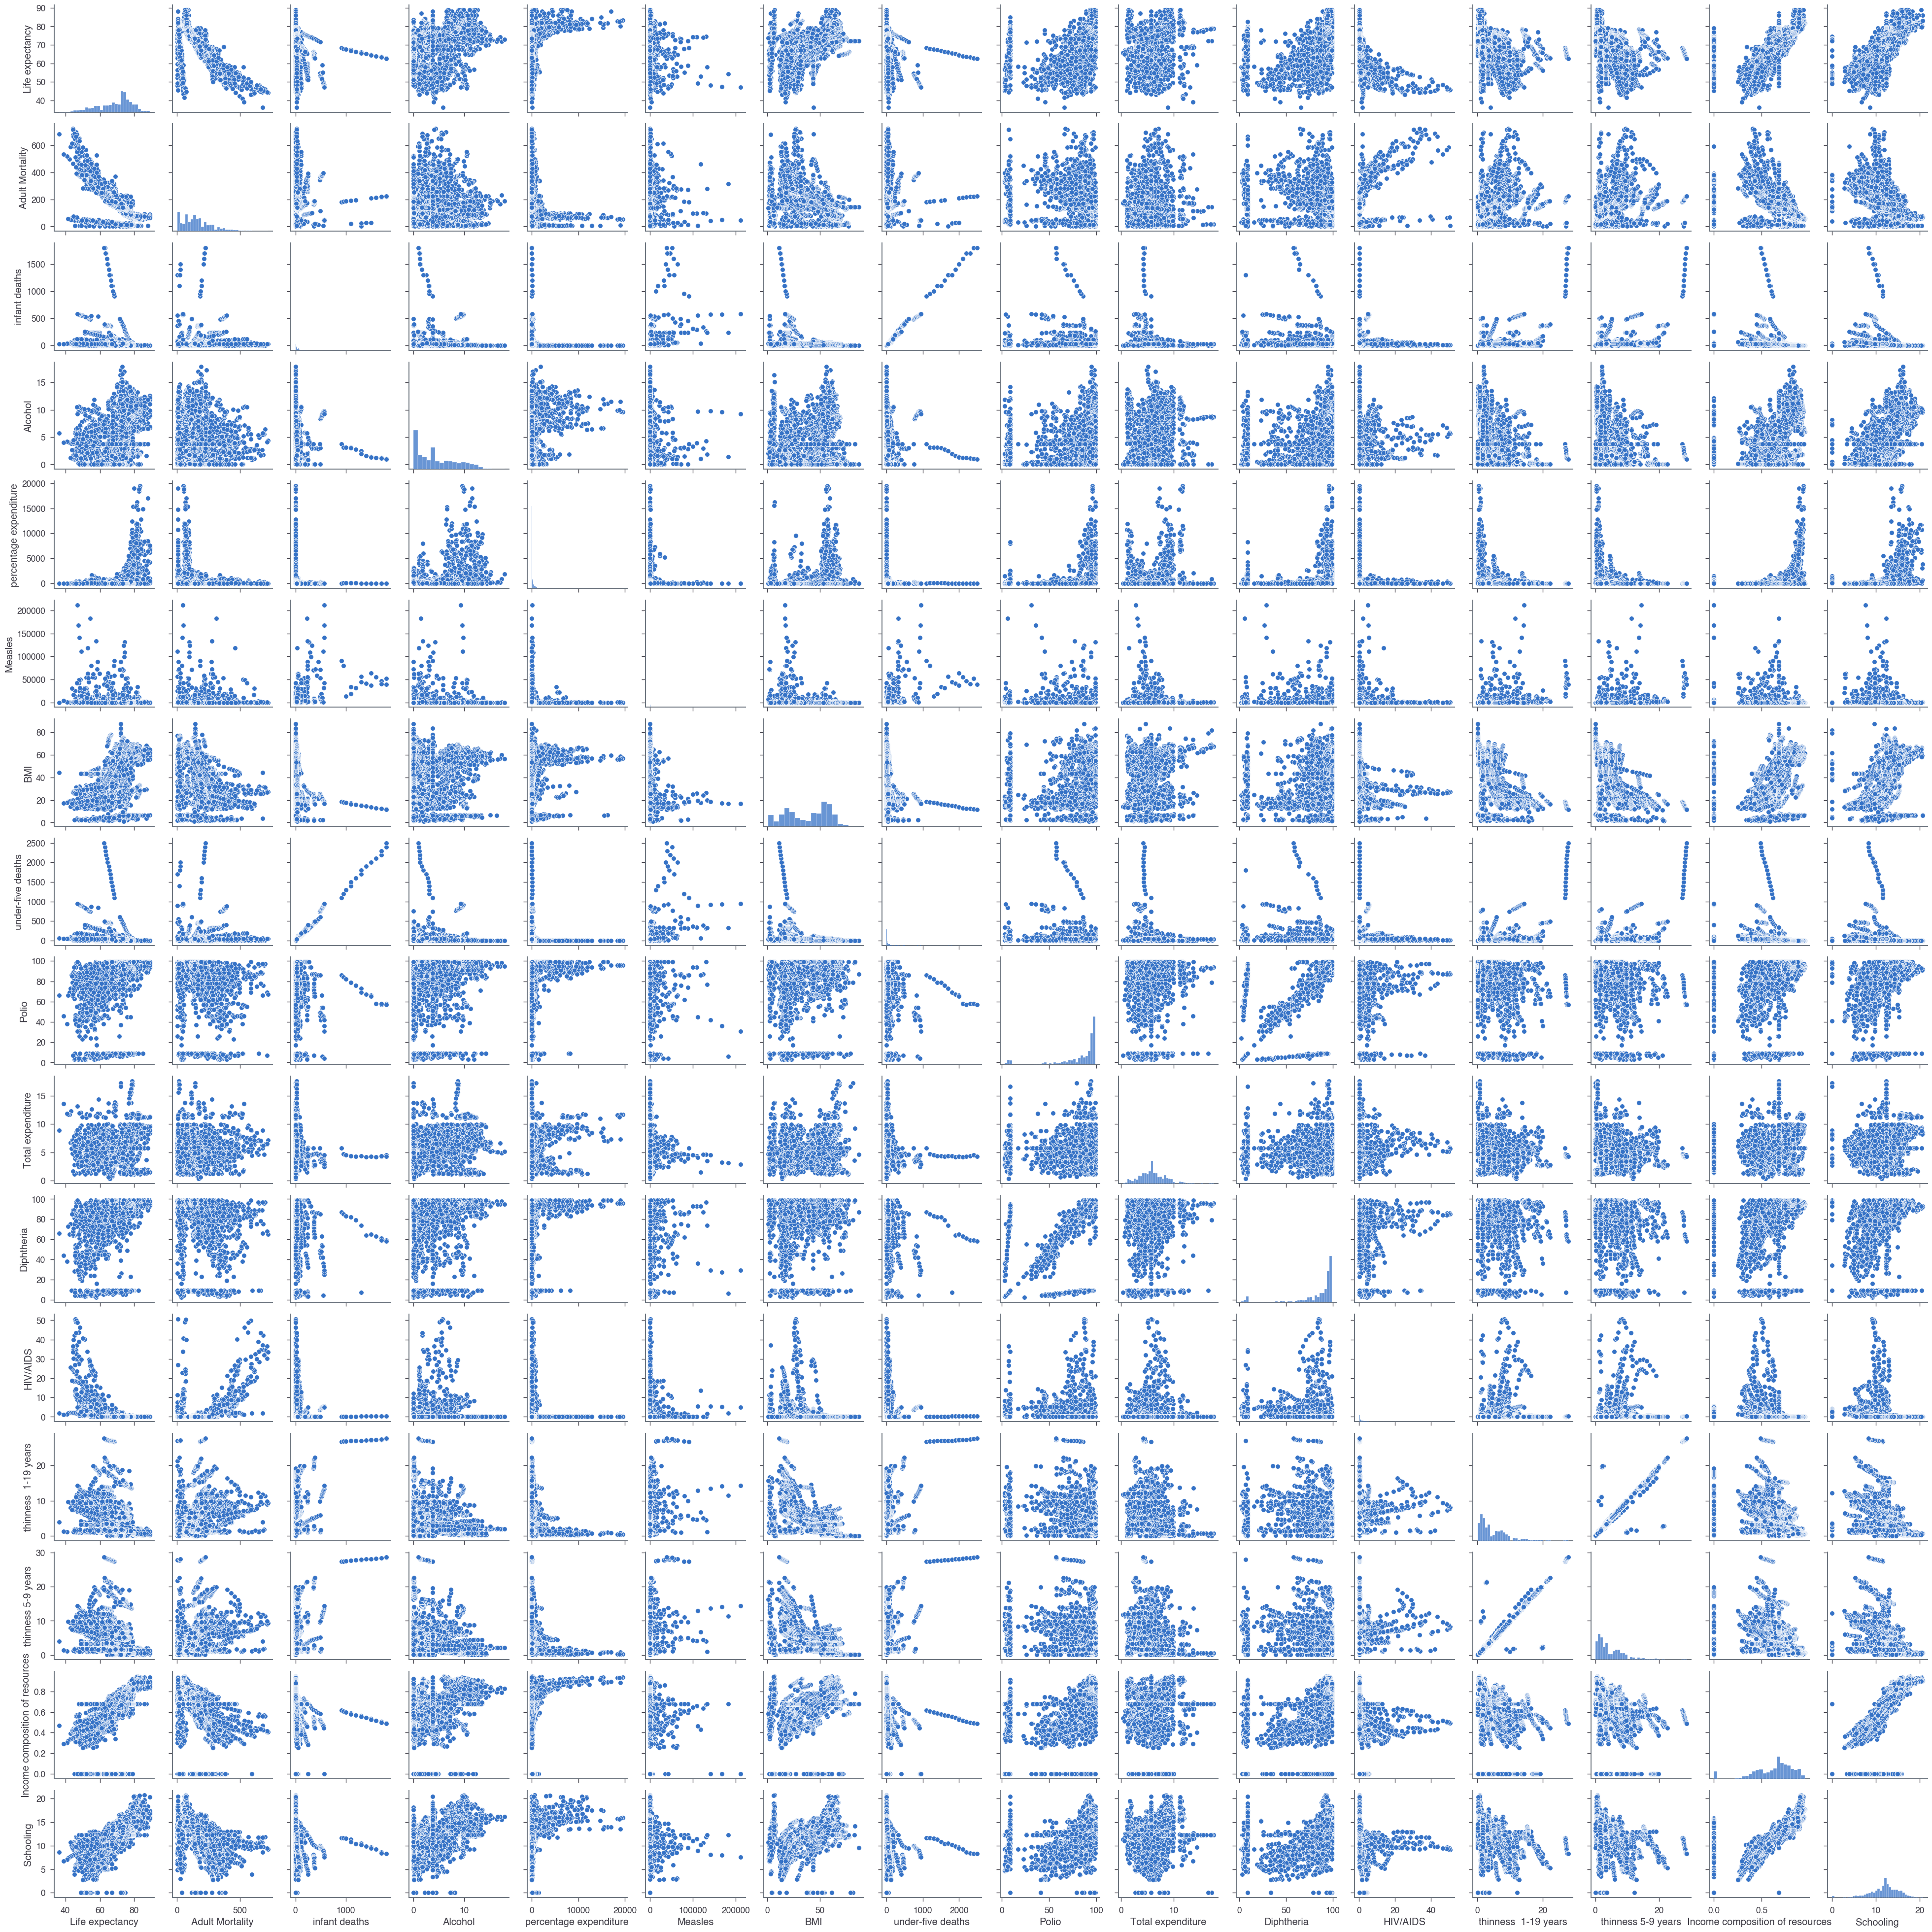

In [26]:
# Plot the pairplots to examine the relationships between the multiple variables
plt.figure(figsize= (20,20))
sns.pairplot(life_expectancy_df)

### Pairplot Analysis
1. Life expectancy vs. Adult Mortality: A clear negative linear relationship, with higher mortality associated with lower life expectancy.
2. Life expectancy vs. Schooling: A positive linear relationship, suggesting higher levels of education are associated with longer life expectancy.
3. BMI vs. Thinness 1-19 years and BMI vs. Thinness 5-9 years: Negative relationships, as expected since thinness and BMI are inversely related.
4. Life expectancy vs. Income composition of resources: A positive relationship, indicating that better income resources are linked with higher life expectancy.

In [22]:
# Create a copy of the original DataFrame to save the correlations
correlations_df = life_expectancy_df.copy()

# Convert non-numeric values to NaN in the 'Life expectancy' column
correlations_df['Life expectancy'] = pd.to_numeric(correlations_df['Life expectancy'], errors='coerce')

# Drop rows with NaN values in the 'Life expectancy' column
correlations_df.dropna(subset=['Life expectancy'], inplace=True)

# Convert other columns to numeric if necessary
correlations_df = correlations_df.apply(pd.to_numeric, errors='coerce')

# Correlation Analysis
correlation_df = correlations_df.corrwith(correlations_df['Life expectancy'])

print(correlation_df)


Life expectancy                    1.000000
Adult Mortality                   -0.696390
infant deaths                     -0.196769
Alcohol                            0.388918
percentage expenditure             0.381418
Measles                           -0.157767
BMI                                0.556901
under-five deaths                 -0.222738
Polio                              0.458399
Total expenditure                  0.208844
Diphtheria                         0.472211
HIV/AIDS                          -0.556703
thinness  1-19 years              -0.468002
thinness 5-9 years                -0.462473
Income composition of resources    0.688662
Schooling                          0.713054
dtype: float64


### Correlations Analysis

Moderate (0.5 to 0.8) Positive Correlations:

1. Life expectancy vs. Schooling (0.713054): This strong positive correlation indicates a significant relationship between life expectancy and schooling.
2. Life expectancy vs. Income composition of resources (0.688662): Another strong positive correlation suggesting a significant association between life expectancy and income composition of resources.
3. Life expectancy vs. BMI (0.556901): A moderate positive correlation indicating a notable relationship between life expectancy and BMI.

Moderate Negative Correlations (-0.8 to -0.5):

1. Life expectancy vs. Adult Mortality (-0.696390): A strong and negative correlation, suggesting a significant relationship between life expectancy and adult mortality rate.
2. Life expectancy vs. HIV/AIDS (-0.556703): A strong and negative correlation, suggesting a significant relationship between life expectancy and HIV/AIDS prevalence.

Weak Positive Correlations (0.3 to 0.5):

1. Life expectancy vs. Polio (0.458399): A moderate positive correlation, implying a noticeable relationship between life expectancy and vaccination coverage against polio.
2. Life expectancy vs. Diphtheria (0.472211): A moderate positive correlation, implying a noticeable relationship between life expectancy and vaccination coverage against diphtheria.
3. Life expectancy vs. Alcohol (0.388918): This moderate positive correlation indicates a notable relationship between life expectancy and alcohol consumption.
4. Life expectancy vs. percentage expenditure (0.381418): Another moderate positive correlation suggesting a notable relationship between life expectancy and health expenditure as a percentage of GDP.

Weak Negative Correlations (-0.5 to -0.3 ):

1. Life expectancy vs. thinness 1-19 years (-0.468002): Moderate negative correlations indicating a notable relationship between life expectancy and thinness in younger age groups.   
2. Life expectancy vs. thinness 5-9 years (-0.462473): Moderate negative correlations indicating a notable relationship between life expectancy and thinness in younger age groups.    

In [27]:
# Sort correlations in descending order and take the absolute value
sorted_pos_correlation = correlation_df.abs().sort_values(ascending=False)

print(sorted_pos_correlation)

Life expectancy                    1.000000
Schooling                          0.713054
Adult Mortality                    0.696390
Income composition of resources    0.688662
BMI                                0.556901
HIV/AIDS                           0.556703
Diphtheria                         0.472211
thinness  1-19 years               0.468002
thinness 5-9 years                 0.462473
Polio                              0.458399
Alcohol                            0.388918
percentage expenditure             0.381418
under-five deaths                  0.222738
Total expenditure                  0.208844
infant deaths                      0.196769
Measles                            0.157767
dtype: float64


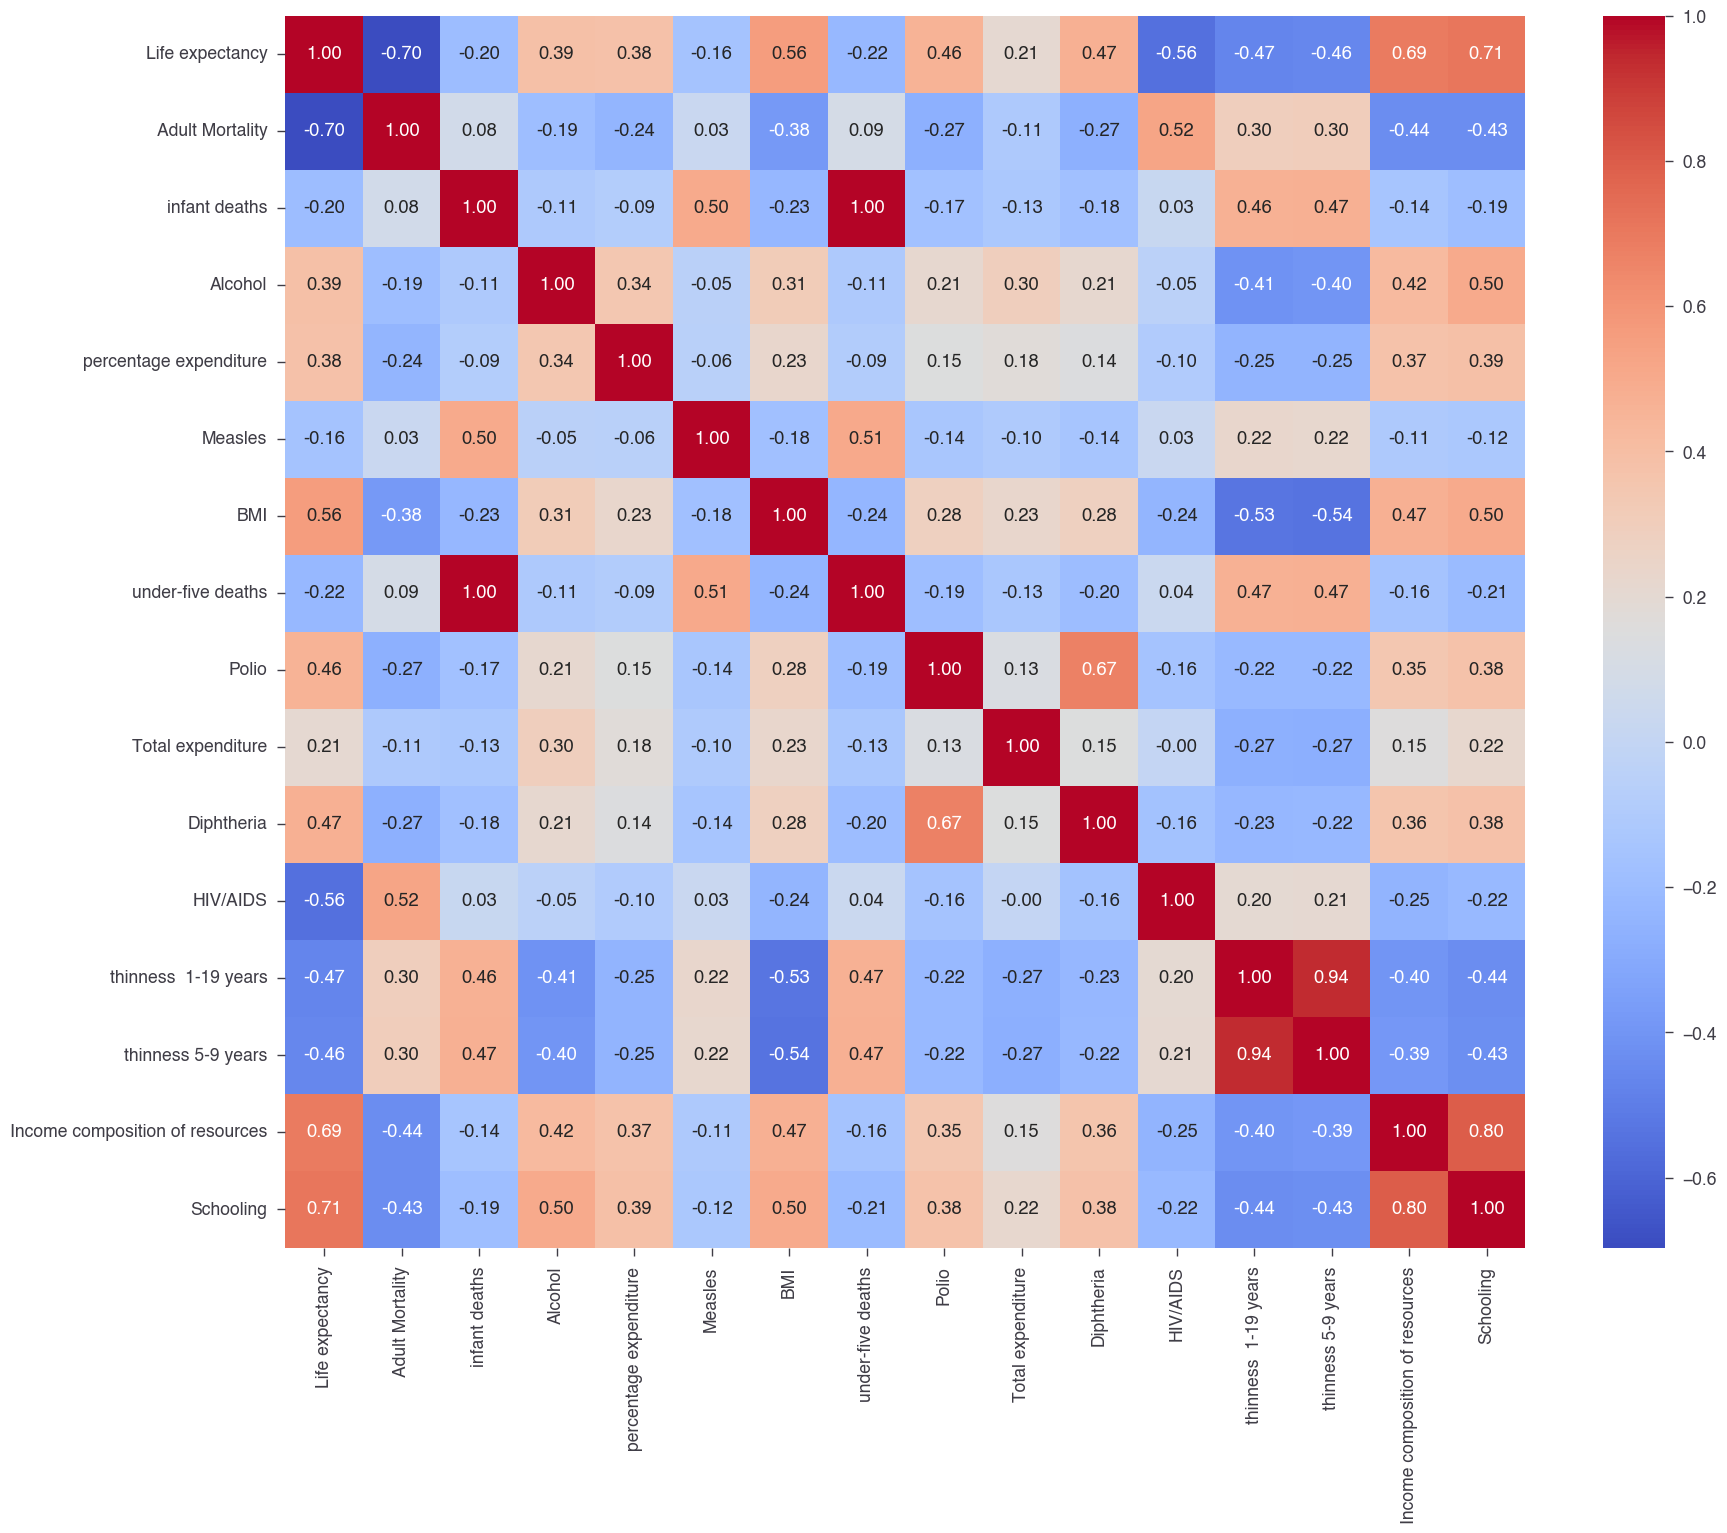

In [17]:
# Calculate the correlation matrix
correlation_matrix = life_expectancy_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

### Correlation Matrix Analysis

1. Life expectancy has a strong positive correlation with Schooling (0.71) and Income composition of resources (0.69).
2. Life expectancy has a strong negative correlation with Adult Mortality (-0.70) and HIV/AIDS (-0.56).
3. Adult Mortality is strongly positively correlated with HIV/AIDS (0.52) and negatively correlated with BMI (-0.38).
4. BMI has a positive correlation with Life expectancy (0.56) and a negative correlation with Thinness 1-19 years (-0.53) and Thinness 5-9 years (-0.54).
5. HIV/AIDS shows a negative correlation with Life expectancy (-0.56) and BMI (-0.24), while being positively correlated with Adult Mortality (0.52).


In [26]:
# Correlation Analysis
correlation_series = correlations_df.corrwith(correlations_df['Life expectancy'])

# Filter out correlation with 'Life expectancy' (which is 1.0)
correlation_series = correlation_series[correlation_series.index != 'Life expectancy']

# Get top three correlations by absolute value
top_three_correlations = correlation_series.abs().nlargest(3)

# Print the top three correlations and their values
print("Top three correlations:")
for idx in top_three_correlations.index:
    print(f"{idx}: {correlation_series[idx]}")


Top three correlations:
Schooling: 0.7130535310931976
Adult Mortality: -0.696390066157862
Income composition of resources: 0.6886616217274305


In [27]:
# Establish the top three correlated features with 'Life expectancy'
top_three_correlations = ['Schooling', 'Adult Mortality', 'Income composition of resources']

# Creating a new DataFrame with the selected columns
top_three_df = life_expectancy_df[['Life expectancy'] + top_three_correlations].copy()

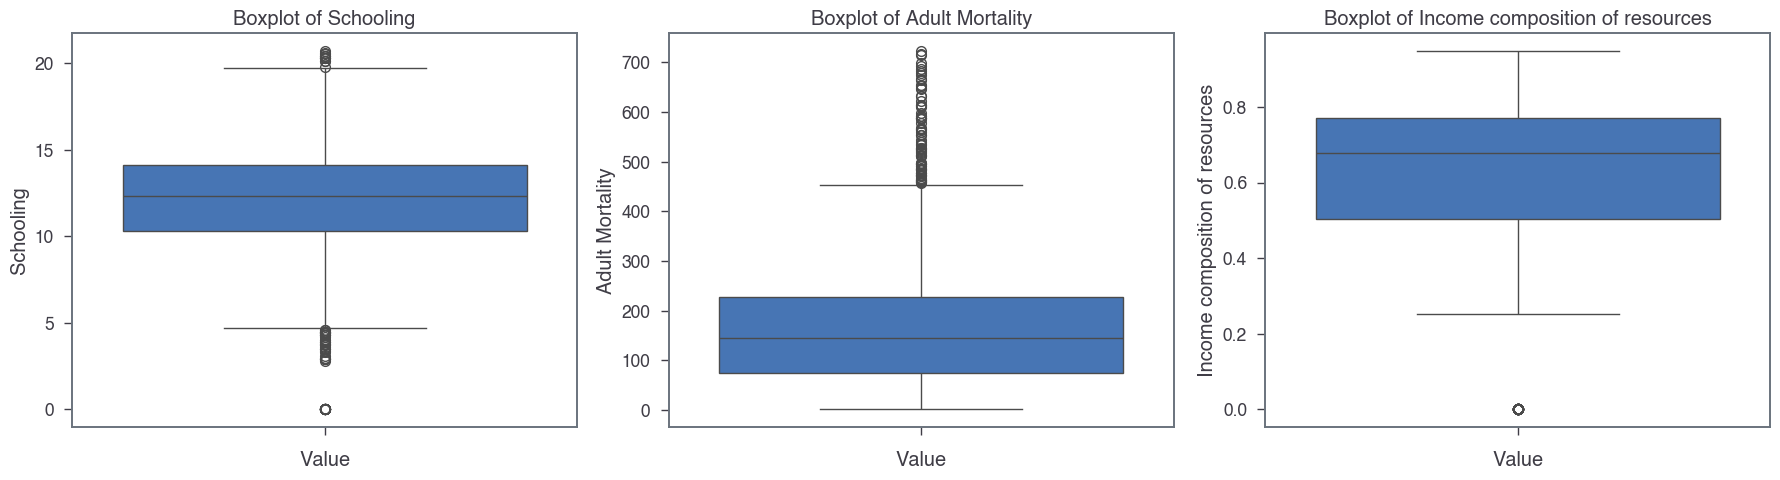

In [28]:
# Plotting boxplots for the top three correlations
plt.figure(figsize=(18, 5))
for i, feature in enumerate(top_three_correlations, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=feature, data=top_three_df)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Value')
plt.tight_layout()
plt.show()


<Axes: xlabel='Schooling', ylabel='Life expectancy'>

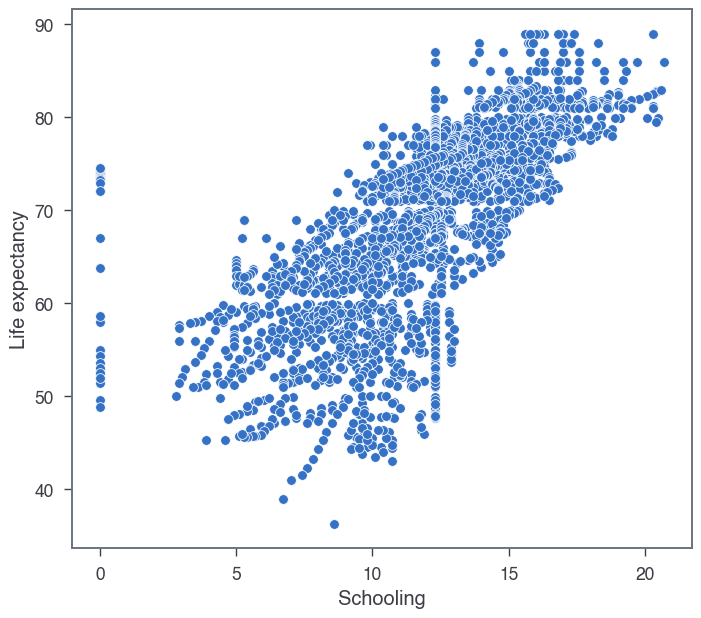

In [35]:
# Create scatterplot for schooling vs life expectancy
sns.scatterplot(data = life_expectancy_df, x = 'Schooling', y = 'Life expectancy')

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy'>

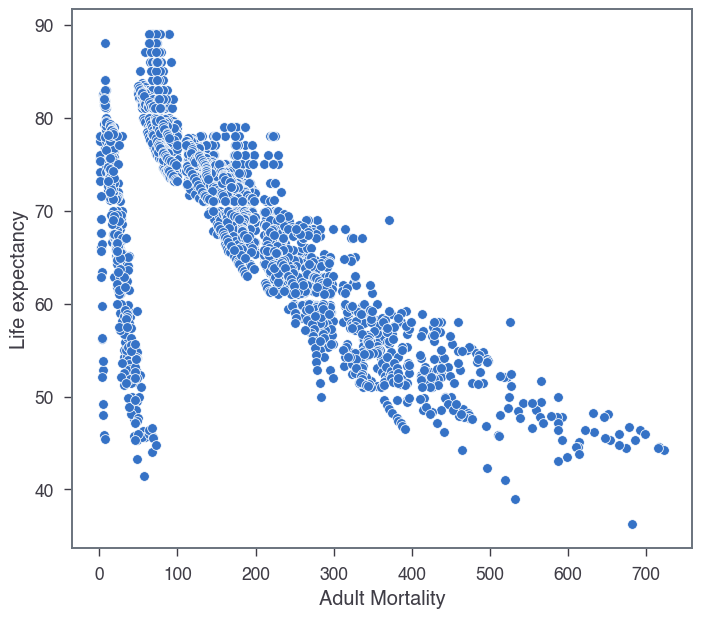

In [37]:
sns.scatterplot(data = life_expectancy_df, x = 'Adult Mortality', y = 'Life expectancy')

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy'>

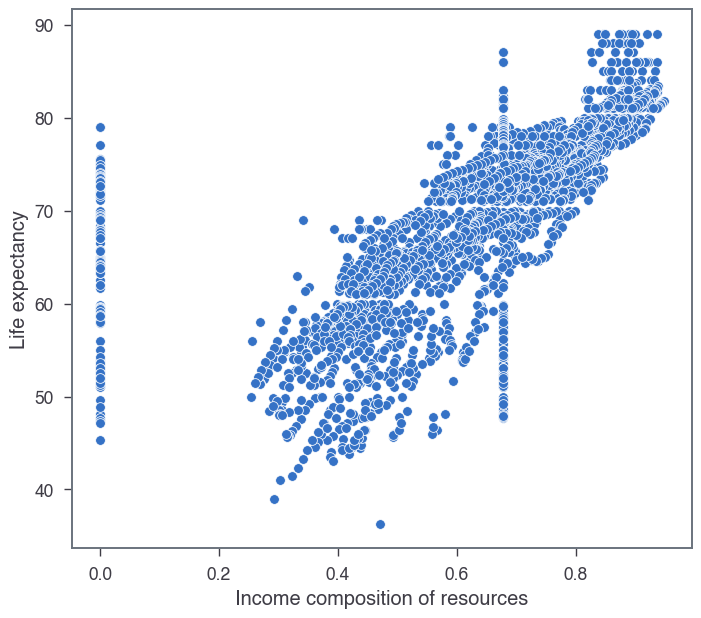

In [36]:
sns.scatterplot(data = life_expectancy_df, x = 'Income composition of resources', y = 'Life expectancy')

## EDA Findings & Conclusion
The analysis reveals significant relationships between life expectancy and several key factors such as education, income resources, and health indicators. Higher education and better income resources are associated with higher life expectancy, while higher adult mortality, HIV/AIDS prevalence, and thinness are associated with lower life expectancy. The distributions of these variables indicate significant variability across different regions, with many outliers suggesting disparities in health outcomes and resources. Understanding these correlations and distributions can help in targeting policies and interventions to improve life expectancy and overall health.

### Summary
1. Life expectancy is generally higher in countries with lower adult mortality, infant deaths, and HIV/AIDS prevalence, and higher GDP and schooling levels.
2. There is significant variability in health expenditure, vaccination rates, and disease prevalence across countries.
3. Missing data was a notable issue, particularly for economic indicators and vaccination rates.
4. The distributions reveal that most countries have low mortality rates, moderate to high life expectancy, and varying degrees of economic and health investments.



# Models

## Model 1: Simple Linear Regression using OLS Regression

### Model Selection Criteria

#### Simple Linear Regression: An Appropriate Choice
Because linear regression is a simple and computationally efficient approach that provides easily interpretable results, it was an appropriate starting place. Using Schooling as the sole feature, it was able to offer direct insight into the relationship between Schooling and life expectancy. This method assumes linearity, which is reasonable given the strong correlation between education levels and health outcomes, where higher education often leads to better health awareness and access to healthcare services. Despite its sensitivity to multicollinearity and the potential for overfitting with many features, starting with linear regression allows us to establish a foundational understanding of how a key feature like Schooling influences life expectancy, setting the stage for more complex models if needed.

#### Feature Selection: Schooling

1. Correlation: In general, education levels are closely linked to health outcomes. Higher education often leads to better health awareness, access to healthcare services, and healthier lifestyle choices, all of which contribute to higher life expectancy. Further, Schooling had the strongest correlation to life expectancy. 

2. Predictive Power: Schooling can capture the long-term impact of education on health and mortality rates, making it a potentially powerful predictor.

#### OLS Regression Method

1. Simplicity and Interpretability:
OLS regression is straightforward to understand and interpret. The coefficients obtained directly indicate the relationship between each predictor and the target variable, which helps in making the results more interpretable.

2. Small Variance:
Under the assumptions of OLS (linearity, independence, homoscedasticity, and normality), OLS regression provides the smallest variance among all unbiased linear estimators. This means it produces reliable estimates of the coefficients.

3. Computational Efficiency:
OLS regression is computationally efficient, especially suitable for datasets with a moderate number of features and observations. It allows for quick model training and prediction.

#### Potential Downsides

1. Multicollinearity:
OLS regression does not handle multicollinearity well. When predictors are highly correlated, it can lead to unstable estimates of the coefficients.

2. Non-linearity:
OLS regression assumes a linear relationship between the predictors and the target variable. It does not handle non-linear relationships effectively, which can limit its predictive accuracy if the true relationship is non-linear.

3. Risk of Overfitting:
Simple linear regression can be prone to overfitting, especially with small datasets or when including many predictors. Overfitting can result in a model that performs well on training data but poorly on unseen test data.

#### Summary of Model Choice

Starting with Schooling as the initial feature in a simple linear regression model using OLS is a logical choice due to its strong correlation with life expectancy and its direct influence on health outcomes. OLS regression is simple, interpretable, and computationally efficient, making it a good starting point. However, it’s important to be aware of its limitations regarding multicollinearity, non-linearity, and overfitting. Further steps can include exploring more complex models or additional features to improve predictive performance.

In [66]:
# Establish the variables
X = top_three_df[['Schooling']]  # Predictor
y = top_three_df['Life expectancy']  # Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model1 = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     2354.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:23:43   Log-Likelihood:                -7822.9
No. Observations:                2350   AIC:                         1.565e+04
Df Residuals:                    2348   BIC:                         1.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2602      0.534     82.831      0.0

In [67]:
# Make predictions
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Model 1:\n")

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Model 1:

Training RMSE: 6.752779810783825
Testing RMSE: 6.30631728983159


### Performance

#### OLS Model Results
R-squared: 0.501
This indicates that approximately 50.1% of the variance in the life expectancy values can be explained by the predictor variable 'Schooling'. This is a moderate level of explanation, indicating a significant but not overwhelming relationship between 'Schooling' and 'Life expectancy'.

Adjusted R-squared: 0.500
The adjusted R-squared value is very close to the R-squared value (0.500). This similarity indicates that adding additional predictors to the model is not likely to significantly increase the explanatory power.

F-statistic: 2354
The F-statistic is very high, with a p-value of 0.00. This indicates that the model is statistically significant, and there is a strong relationship between the predictor 'Schooling' and the dependent variable 'Life expectancy'.

P-value:
The coefficient for schooling is highly significant (p-value = 0.000), indicating that schooling is indeed a relevant predictor for life expectancy. A low p-value suggests that the observed relationship is unlikely to be due to random chance.

##### Coefficients
Intercept (const): 44.2602
This is the expected value of 'Life expectancy' when 'Schooling' is zero. While it's not realistic for schooling to be zero, this provides a baseline for interpretation.

Schooling: 2.0781
This coefficient indicates that for each additional year of schooling, the life expectancy increases by approximately 2.08 years, holding all else constant. This positive relationship suggests that higher levels of education are associated with longer life expectancy.

##### Interpretation
The model indicates a significant and positive relationship between schooling and life expectancy, with each additional year of schooling associated with an increase of approximately 2.08 years in life expectancy.
The R2 value of 0.555 suggests that the model explains a moderate proportion of the variance in life expectancy.

#### Performance Metrics
Training RMSE (6.7528): This indicates, on average, the model's predictions are off by approximately 6.75 years of life expectancy when compared to actual values in the training dataset.

Testing RMSE (6.3063): This suggests, on average, the model's predictions are off by about 6.31 years of life expectancy when applied to new, unseen data from the test dataset. 

In the context of life expectancy prediction, these RMSE values are moderate. While the model provides reasonably accurate predictions, further improvements could potentially reduce prediction errors and enhance its utility.

#### Conclusion

The model offers valuable insights into the relationship between schooling and life expectancy, highlighting the significant impact of education on health outcomes. However, it is essential to recognize that the model's explanatory power, as indicated by R-squared, is moderate, leaving approximately 49.9% of the variability in life expectancy unexplained by schooling alone.

Limitations include potential issues with residual normality and the possibility of unmeasured confounding variables influencing life expectancy outcomes. Addressing these limitations through refined modeling approaches or additional data exploration could further enhance predictive accuracy.

#### Considerations & Next Steps
To improve the model's predictive power, we will incorporating additional relevant predictors: 'Income composition of resources', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Diphtheria', 'Polio', and 'Alcohol'. These variables were selected based on their potential correlations with life expectancy and could complement the current model by capturing additional variance in life expectancy outcomes.

## Model 2: Multilinear Regression using OLS

### Model Selection Criteria

#### Mulitple Linear Regression: An Appropriate Choice
Multilinear regression is an appropriate next step because it allows us to consider multiple predictors simultaneously, providing a more nuanced understanding of the factors influencing life expectancy. By incorporating additional relevant features, we can capture a broader range of influences on life expectancy, which a simple linear regression with a single predictor might miss. This approach can improve the model's explanatory power and predictive accuracy, leveraging the combined effect of several correlated factors. Multilinear regression helps account for the complexity of real-world data, where multiple variables often interact to affect the outcome.

#### Feature Selection
To improve the model, we selected features strongly correlated with life expectancy. Schooling, with a correlation of 0.713, remains a key predictor due to its established positive impact on health outcomes. The inclusion of Income composition of resources (0.689) captures socioeconomic factors that influence access to healthcare and overall health. Adult Mortality (-0.696) is negatively correlated, indicating that lower mortality rates are associated with higher life expectancy. BMI (0.557) directly affects health, with both low and high values being risk factors. HIV/AIDS prevalence (-0.557) significantly impacts life expectancy, especially in regions with high infection rates. Vaccination rates for Diphtheria (0.472) and Polio (0.458) reflect healthcare system quality, while Alcohol consumption (0.389) links to various health outcomes. Including these features provides a comprehensive model, capturing diverse factors affecting life expectancy.

#### Potential Downsides
While multilinear regression offers the advantage of considering multiple predictors, it also presents challenges such as multicollinearity, where predictors are highly correlated with each other. This can inflate the variance of coefficient estimates, making them unstable and difficult to interpret. Multilinear regression assumes linear relationships between the predictors and the target variable, which may not hold true for all features. Overfitting is another risk, especially with a large number of predictors, where the model captures noise rather than the underlying pattern. Proper feature selection, regularization techniques, and diagnostic checks are essential to mitigate these issues.

#### Summary of Model Choice
Starting with linear regression using Schooling as a predictor provides a simple and interpretable model to understand the relationship between education and life expectancy. Moving to multilinear regression allows us to incorporate additional relevant features such as Income composition, Adult Mortality, BMI, HIV/AIDS, and vaccination rates, enhancing the model's explanatory power. While this approach offers a more comprehensive understanding of the factors influencing life expectancy, it also introduces challenges like multicollinearity and the risk of overfitting. Careful feature selection and model diagnostics are crucial to building a robust and reliable model.

In [69]:
# Try adding more features to improve Adj. R-squared score
# Select relevant columns based on moderate or strong correlation of 0.3 < r < 1 or -0.3 < r < 0
features = [
    'Schooling', 
    'Income composition of resources', 
    'Adult Mortality', 
    'BMI', 
    'HIV/AIDS', 
    'Diphtheria', 
    'Polio', 
    'Alcohol'
]

# Establish new x & y
X = life_expectancy_df[features]  # Predictor
y = life_expectancy_df['Life expectancy']  # Response

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model2 = sm.OLS(y_train, X_train).fit()

# Print the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1153.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:24:15   Log-Likelihood:                -6761.6
No. Observations:                2350   AIC:                         1.354e+04
Df Residuals:                    2341   BIC:                         1.359e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [70]:
# Make predictions
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Model 2:\n")

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Model 2:

Training RMSE: 4.298820018818227
Testing RMSE: 4.127409583464758


### Performance

#### OLS Model Results
R-squared: 0.798
This indicates that approximately 79.8% of the variance in life expectancy can be explained by the predictor variables 'Schooling', 'Income composition of resources', and 'Adult Mortality'. This is a strong level of explanation, suggesting a good fit of the model to the data.

Adjusted R-squared: 0.797
The adjusted R-squared value is very close to the R-squared value (0.797), indicating that the addition of these three predictors explains a significant portion of the variance in life expectancy, and adding more variables might not drastically improve the model.

F-statistic: 1153
The F-statistic is very high, with a p-value of 0.00, indicating that the overall model is statistically significant. There is a strong relationship between the predictors and the dependent variable.

##### Coefficients
Intercept (const): 51.5293
This is the expected value of life expectancy when all predictor variables are zero. While this scenario might not be realistic, it provides a baseline for interpretation.

Schooling: 0.7163
This coefficient indicates that for each additional year of schooling, life expectancy increases by approximately 0.7 years, holding all other variables constant. This positive relationship suggests that higher levels of education are associated with longer life expectancy.

Income composition of resources: 8.0578
This coefficient indicates that a unit increase in the income composition of resources is associated with an increase in life expectancy by approximately 8 years, holding all other variables constant. This strong positive relationship highlights the importance of income composition in determining life expectancy.

Adult Mortality, BMI, HIV/AIDS, Diphtheria, Polio, Alcohol: These coefficients were low. 

#### Performance Metrics
Training RMSE (4.2988): This indicates, on average, the model's predictions are off by approximately 4.3 years of life expectancy when compared to actual values in the training dataset.

Testing RMSE (4.1274): This suggests, on average, the model's predictions are off by about 4.1 years of life expectancy when applied to new, unseen data from the test dataset. 

#### Conclusion

The multiple linear regression model not only improves the explanatory power (R-squared) but also reduces prediction errors (RMSE) compared to the simple linear regression with only Schooling as a predictor. This suggests that factors such as income composition, adult mortality, BMI, disease prevention measures (like Diphtheria and Polio immunization rates), and alcohol consumption play significant roles in determining life expectancy beyond educational attainment alone. However, it's important to note the presence of potential multicollinearity issues, suggesting caution in interpreting individual coefficient estimates.

#### Considerations & Next Steps

Given the strong performance of the multiple linear regression model, with an R-squared of 0.798 and a substantial reduction in RMSE compared to the simple linear regression, it's clear that including additional predictors like Income composition of resources and Adult Mortality significantly improves the model's explanatory power. However, the presence of multicollinearity among the predictors is a concern, as it can inflate the variance of the coefficient estimates and complicate their interpretation. The next step is to thoroughly check for multicollinearity by analyzing the correlation matrix and calculating the Variance Inflation Factor (VIF) values for each predictor. Identifying and addressing multicollinearity issues will help ensure the reliability of the coefficient estimates and improve the overall robustness of the model. Depending on the results, we may need to remove or combine highly correlated features, or consider alternative modeling techniques if multicollinearity remains problematic. This careful diagnostic process will refine the model and ensure that it accurately captures the relationships between the predictors and life expectancy.


## Address Multicollinearity

### Check Correlations

In [72]:
# Check for multicollinearity by analyzing correlation matrix

features = [
    'Schooling', 
    'Income composition of resources', 
    'Adult Mortality', 
    'BMI', 
    'HIV/AIDS', 
    'Diphtheria', 
    'Polio', 
    'Alcohol'
]

# Establish new x & y
X = life_expectancy_df[features]

# Assuming X contains your predictor variables
correlation_matrix = X.corr()

# Display the correlation matrix
print(correlation_matrix)

                                 Schooling  Income composition of resources  \
Schooling                         1.000000                         0.795383   
Income composition of resources   0.795383                         1.000000   
Adult Mortality                  -0.433415                        -0.436332   
BMI                               0.499806                         0.471947   
HIV/AIDS                         -0.218822                        -0.247823   
Diphtheria                        0.379062                         0.359379   
Polio                             0.375830                         0.345172   
Alcohol                           0.498899                         0.418372   

                                 Adult Mortality       BMI  HIV/AIDS  \
Schooling                              -0.433415  0.499806 -0.218822   
Income composition of resources        -0.436332  0.471947 -0.247823   
Adult Mortality                         1.000000 -0.379092  0.523886   


#### Summary of Findings

1. Schooling and Income composition of resources:
Correlation coefficient: 0.795
These variables are strongly positively correlated. This indicates that higher levels of schooling tend to be associated with higher income composition of resources. This high correlation suggests multicollinearity, which may affect the stability and interpretability of their individual coefficients in the regression model.

2. Adult Mortality:
Moderate negative correlations with:
Schooling: -0.433
Income composition of resources: -0.436
These negative correlations indicate that higher levels of schooling and income composition of resources are associated with lower adult mortality rates.

3. BMI:
Moderate positive correlations with:
Schooling: 0.500
Income composition of resources: 0.472
Indicates that higher levels of schooling and income composition of resources are associated with higher BMI values.

4. HIV/AIDS, Diphtheria, Polio, and Alcohol:
Generally low to moderate correlations with each other and with other predictors.
These variables show weaker relationships compared to the stronger correlations observed between Schooling and Income composition of resources.

#### Multicollinearity Considerations

With a correlation coefficient of 0.795, Schooling and Income composition of resources are highly correlated. This suggests that these variables capture similar information about life expectancy, potentially leading to multicollinearity in the regression model. High multicollinearity can inflate standard errors of coefficients, making them less reliable for inference. It can also lead to unstable coefficient estimates, where small changes in data or model specification can lead to large changes in results.

### Check VIF values

In [73]:
# Check for multicollinearity by analyzing VIF values

features = [
    'Schooling', 
    'Income composition of resources', 
    'Adult Mortality', 
    'BMI', 
    'HIV/AIDS', 
    'Diphtheria', 
    'Polio', 
    'Alcohol'
]

# Establish new x & y
X = life_expectancy_df[features]

# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                           feature        VIF
0                        Schooling  41.199195
1  Income composition of resources  29.645288
2                  Adult Mortality   3.116316
3                              BMI   6.731316
4                         HIV/AIDS   1.557951
5                       Diphtheria  24.092653
6                            Polio  24.323917
7                          Alcohol   3.079983


#### Summary of Findings

1. Schooling: VIF = 41.199
This extremely high VIF suggests severe multicollinearity between Schooling and other variables in the model. Particularly, Schooling has a high correlation with Income composition of resources (VIF = 29.645) and moderate correlations with Diphtheria (VIF = 24.093) and Polio (VIF = 24.324). These correlations indicate that Schooling shares a substantial amount of variance with these predictors.

2. Income composition of resources: VIF = 29.645
Similar to Schooling, Income composition of resources shows high multicollinearity with other variables, notably Schooling and Diphtheria (VIF = 24.093).

3. Diphtheria and Polio: VIF = 24.093 and VIF = 24.324, respectively
These variables exhibit high VIF values, indicating strong multicollinearity with each other and with other predictors in the model.

4. BMI, Alcohol, Adult Mortality, and HIV/AIDS: VIF values range from 1.558 to 6.731
These variables generally show lower VIF values, suggesting less severe multicollinearity compared to Schooling and Income composition of resources. However, moderate multicollinearity might still affect the precision of their coefficient estimates.

#### Multicollineary Considerations

The high VIF values for 'Schooling' and 'Income composition of resources' indicate that multicollinearity is a significant issue in your dataset. Diphtheria (VIF = 24.093) and Polio (VIF = 24.324) variables also have high VIF values, reinforcing the presence of multicollinearity issues. This can make it difficult to interpret the effects of these variables, as their high correlation with each other and/or other predictors inflates the variance of the estimated coefficients. With such high multicollinearity, the ordinary least squares (OLS) regression model may produce unreliable coefficient estimates, leading to potential overfitting and issues in model interpretation.

#### Considerations and Next Steps

Given the severe multicollinearity issues indicated by the high VIF values for 'Schooling' (41.199) and 'Income composition of resources' (29.645), as well as for Diphtheria (24.093) and Polio (24.324), the next logical step is to employ a Random Forest model. Random Forests are robust to multicollinearity and can handle complex interactions between variables without being negatively impacted by their correlations. This model will allow us to leverage the predictive power of multiple features, including those with high multicollinearity, while avoiding the instability and inflated variances associated with OLS regression. By using a Random Forest, we can also gain insights into feature importance, providing a clearer understanding of how each predictor contributes to life expectancy. This approach will improve the model's accuracy and reliability, making it a suitable choice for predicting life expectancy.

## Model 3: Random Forest

### Model Selection Criteria

#### Random Forest: An Appropriate Choice
To address the multicollinearity issue and further enhance the model's predictive capabilities, the next step is to implement a Random Forest model. Random Forests are robust to multicollinearity and can handle complex interactions between predictors without requiring the assumptions of linearity. They also provide variable importance metrics, which can help in understanding the relative impact of each feature on life expectancy. This approach will enable us to build a more reliable model that captures the intricate relationships between the various factors influencing life expectancy while mitigating the issues associated with multicollinearity.

#### Feature Selection
Using all features for the Random Forest model allowed for fully leveraging the comprehensive information each variable provides about life expectancy. Random Forests are well-suited for handling multicollinearity and complex interactions between predictors, allowing us to include variables that would otherwise complicate linear models due to their high intercorrelations. By using all available features, we can capture the intricate and non-linear relationships that exist among predictors, leading to a more robust and accurate model. Additionally, the Random Forest model's ability to provide variable importance metrics will help us understand the relative impact of each feature on life expectancy.

#### Benefits of Random Forest Method

1. Handling Multicollinearity:
Unlike linear models, Random Forests do not assume independence between predictors. Therefore, multicollinearity does not have the same negative impact on model performance.

2. Feature Importance:
Random Forests can help identify the most important features, even in the presence of multicollinearity, by averaging over many trees.

3. Non-linear Relationships:
Random Forests can capture non-linear relationships between predictors and the response variable, which linear models cannot.

#### Potential Downsides of Random Forest
1. Computational Complexity:
Random Forest models require substantial computational resources and time, especially with large datasets and many trees. 

2. Difficult Interpretation
Additionally, while they generally provide good predictive performance, they can be more challenging to interpret compared to simpler models like linear regression. The ensemble nature of Random Forests means that the relationship between predictors and the target variable is aggregated over many trees, making it difficult to understand individual tree decisions and the overall model structure.


#### Summary of Model Choice
To address the multicollinearity issues present in our dataset and enhance the model's predictive capabilities, we have chosen to implement a Random Forest model. This decision is based on the Random Forest's robustness to multicollinearity, its ability to capture complex and non-linear relationships between predictors, and its provision of variable importance metrics that help clarify the impact of each feature on life expectancy. By including all features, we aim to fully utilize the available data to build a comprehensive model. However, we must be mindful of the potential downsides, such as increased computational complexity and reduced interpretability compared to simpler models. Despite these challenges, the Random Forest model is a suitable choice for capturing the intricate relationships influencing life expectancy and providing reliable predictions.

In [74]:
# Prepare data
X = life_expectancy_df.drop(columns=['Life expectancy'])  
y = life_expectancy_df['Life expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest regression model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = forest_model.predict(X_train)

# Calculate evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Print evaluation metrics
print("Training Set Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R2):", r2_train)

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, forest_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Training Set Evaluation Metrics:
Mean Absolute Error (MAE): 0.4415855319148949
Mean Squared Error (MSE): 0.5045746638297889
Root Mean Squared Error (RMSE): 0.7103341916519216
R-squared (R2): 0.994474110425457

Feature Importances:
Adult Mortality: 0.1447
infant deaths: 0.0037
Alcohol: 0.0076
percentage expenditure: 0.0052
Measles: 0.0050
BMI: 0.0186
under-five deaths: 0.0134
Polio: 0.0047
Total expenditure: 0.0057
Diphtheria: 0.0040
HIV/AIDS: 0.5945
thinness  1-19 years: 0.0061
thinness 5-9 years: 0.0093
Income composition of resources: 0.1645
Schooling: 0.0129


/Users/altuser/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Performance

#### Performance Metrics
Mean Absolute Error (MAE): 0.4416
MAE measures the average magnitude of errors in a set of predictions, where lower values indicate better accuracy. In your case, an MAE of 0.4416 suggests that, on average, your predictions are off by approximately 0.44 units of the target variable (life expectancy).

Mean Squared Error (MSE): 0.5046
MSE measures the average of the squared errors, giving more weight to larger errors. Your MSE value indicates the average squared deviation of predicted values from the actual values.

Root Mean Squared Error (RMSE): 0.7103
RMSE is the square root of MSE and provides a measure of the spread of prediction errors. It is in the same unit as the target variable (life expectancy), and a lower RMSE indicates better model performance. Your RMSE of 0.7103 suggests that, on average, your predictions are off by approximately 0.71 units of life expectancy.

R-squared (R2): 0.9945
R-squared represents the proportion of variance in the dependent variable (life expectancy) that is explained by the independent variables (features) in the model. An R-squared close to 1 (or 100%) indicates that the model explains a large proportion of the variability in life expectancy based on the selected features. Your R-squared of 0.9945 indicates that your model fits the training data very well, explaining 99.45% of the variance.

#### Feature Importances:

1. HIV/AIDS: 59.45%
HIV/AIDS appears to be the most influential feature in your model, contributing significantly to predicting life expectancy.

2. Income composition of resources: 16.45%
This feature also plays a substantial role in the model, indicating that higher income composition of resources is associated with higher life expectancy.

3. Adult Mortality: 14.47%
Adult mortality is another important predictor, with a notable influence on life expectancy predictions.

4. Other features (e.g., BMI, Schooling) contribute smaller percentages to the model's predictions, but they still provide valuable information.

#### Conclusions
The dominance of HIV/AIDS and income composition of resources in feature importances suggests these variables strongly influence life expectancy predictions in your model. The random forest model shows excellent performance on the training set, as evidenced by the high R-squared value (0.9945) and relatively low RMSE (0.7103). This indicates that the model fits the training data very well and explains a large proportion of the variance in life expectancy.  

# Results and Analysis

## Performance Comparison
### Model #1: Simple Linear Regression with Schooling
##### Performance Metrics:
        R-squared: 0.501
        Adjusted R-squared: 0.500
        F-statistic: 2354, p-value = 0.00
        Coefficients:
            Intercept: 44.2602
            Schooling: 2.0781
        Training RMSE: 6.7528
        Testing RMSE: 6.3063
##### Analysis: 
This model indicates a significant and positive relationship between schooling and life expectancy, with each additional year of schooling associated with an increase of approximately 2.08 years in life expectancy. However, the model explains only 50.1% of the variance in life expectancy, suggesting the need for additional predictors to improve accuracy.

### Model #2: Multiple Linear Regression with Additional Predictors
##### Performance Metrics:
        R-squared: 0.798
        Adjusted R-squared: 0.797
        F-statistic: 1153, p-value = 0.00
        Coefficients:
            Intercept: 51.5293
            Schooling: 0.7163
            Income composition of resources: 8.0578
        Training RMSE: 4.2988
        Testing RMSE: 4.1274
##### Analysis: 
Including additional predictors like Income composition of resources and Adult Mortality significantly improved the model's explanatory power and reduced prediction errors. However, high multicollinearity was detected among some predictors, necessitating further investigation.

### Model #3: Random Forest with All Features
##### Performance Metrics:
        Mean Absolute Error (MAE): 0.4416
        Mean Squared Error (MSE): 0.5046
        Root Mean Squared Error (RMSE): 0.7103
        R-squared (R2): 0.9945
##### Feature Importances:
        HIV/AIDS: 59.45%
        Income composition of resources: 16.45%
        Adult Mortality: 14.47%
##### Analysis: 
The Random Forest model demonstrated excellent performance, explaining 99.45% of the variance in life expectancy and achieving a low RMSE of 0.7103. This model is robust to multicollinearity and can capture non-linear relationships between predictors and life expectancy.

## Visualize Model Performance

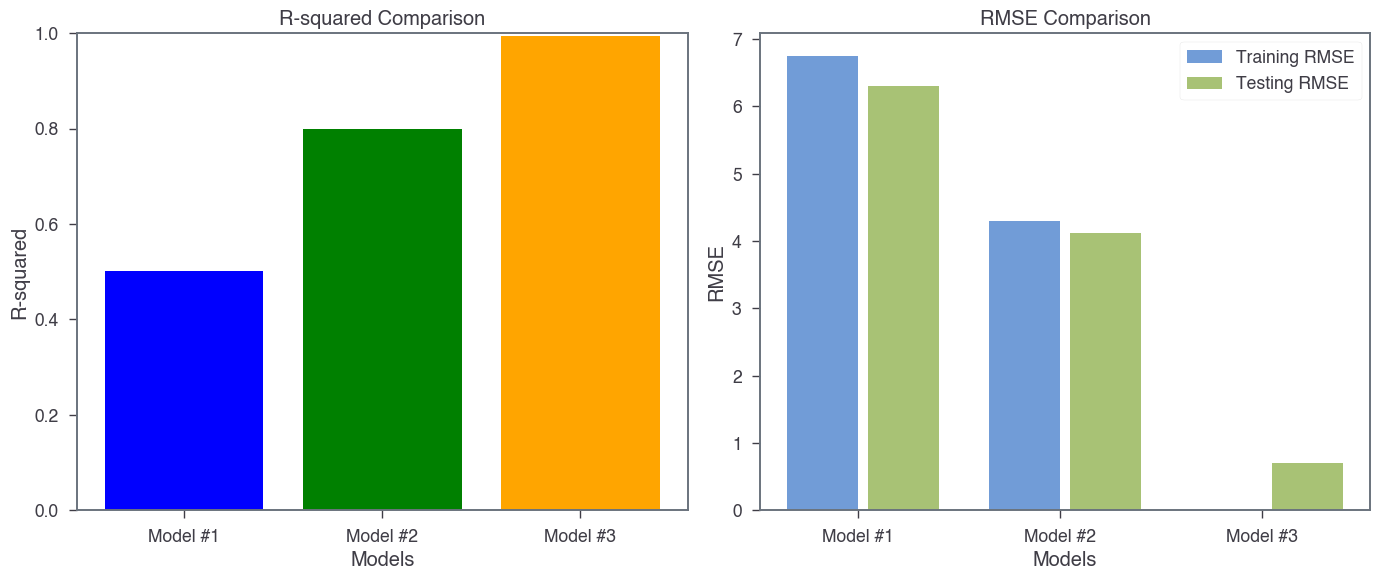

In [20]:
# Define model names and their performance metrics
models = ['Model #1', 'Model #2', 'Model #3']
r_squared = [0.501, 0.798, 0.9945]
training_rmse = [6.7528, 4.2988, None]  # Replace None with your actual value
testing_rmse = [6.3063, 4.1274, 0.7103]
mae = [None, None, 0.4416]  # Replace None with your actual value

# Plotting R-squared and RMSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# R-squared comparison
ax1.bar(models, r_squared, color=['blue', 'green', 'orange'])
ax1.set_title('R-squared Comparison')
ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared')
ax1.set_ylim(0, 1)

# RMSE comparison
bar_width = 0.35
bar_positions_train = np.arange(len(models))
bar_positions_test = bar_positions_train + bar_width + 0.05  # Adjust the gap between bars for clarity

ax2.bar(bar_positions_train, [val if val is not None else 0 for val in training_rmse], label='Training RMSE', width=bar_width, alpha=0.7)
ax2.bar(bar_positions_test, [val if val is not None else 0 for val in testing_rmse], label='Testing RMSE', width=bar_width, alpha=0.7)
ax2.set_title('RMSE Comparison')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE')
ax2.set_xticks(bar_positions_train + bar_width / 2)
ax2.set_xticklabels(models)
ax2.legend()

plt.tight_layout()
plt.show()

# Plotting MAE if available
if all(mae):
    plt.figure(figsize=(8, 6))
    plt.bar(models, mae, color='purple')
    plt.title('Mean Absolute Error (MAE) Comparison')
    plt.xlabel('Models')
    plt.ylabel('MAE')
    plt.show()

## Visualize Feature Importance

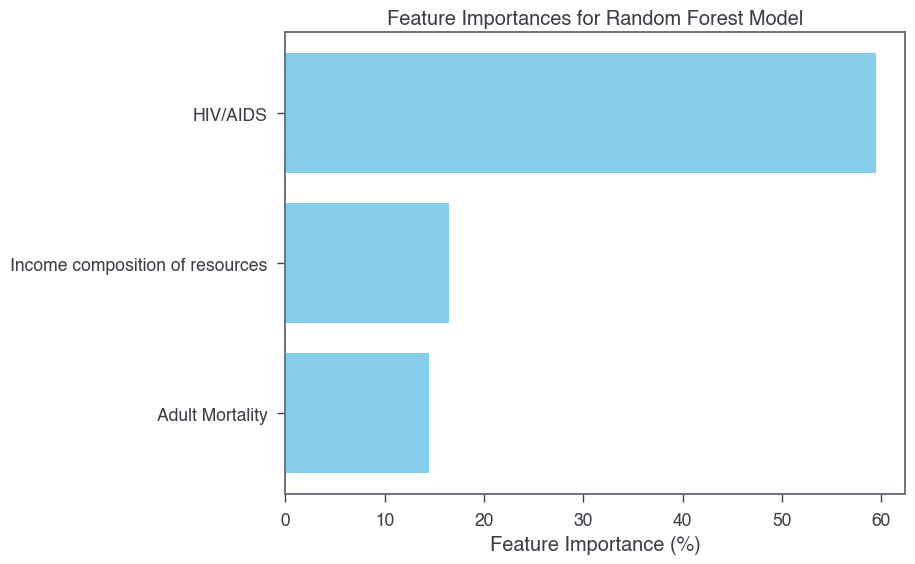

In [13]:
# Define feature importances and their names
feature_names = ['HIV/AIDS', 'Income composition of resources', 'Adult Mortality']
importances = [59.45, 16.45, 14.47]

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance (%)')
plt.title('Feature Importances for Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


## Model Iteration Summary

In the study's findings, three different models were assessed to predict life expectancy based on various predictors. Model #1 utilized simple linear regression with only schooling as a predictor. It showed a moderate relationship, with an R-squared of 0.501; however, this model's predictive power was limited, suggesting the potential benefit of incorporating additional predictors to enhance accuracy. Model #2 employed multiple linear regression with schooling and additional predictors such as income composition of resources. This expanded model significantly improved upon the first, achieving an R-squared of 0.798. Despite this improvement, concerns regarding multicollinearity among predictors were noted, which could impact the model's reliability and interpretation. 

Model #3 utilized a Random Forest approach incorporating all available features, which yielded exceptional predictive performance. It achieved an impressive R-squared of 0.9945, indicating that 99.45% of the variance in life expectancy was explained. The model demonstrated robustness against multicollinearity and captured complex, non-linear relationships between predictors and life expectancy. Feature importance analysis highlighted HIV/AIDS prevalence as the most influential predictor, followed by income composition of resources and adult mortality.

Overall, while Model #1 and Model #2 provided foundational insights into the relationship between education, socioeconomic factors, and life expectancy, Model #3's Random Forest approach showcased superior predictive accuracy and robustness. It underscored the importance of leveraging advanced modeling techniques to capture intricate relationships within complex datasets, offering potential avenues for further research and policy implications in public health and education planning.



● Does it have a proper visualization? (E.g.,
tables, graphs/plots, heat maps, statistics
summary with interpretation, etc.)
● Does it use different kinds of evaluation
metrics properly? (E.g., if your data is
imbalanced, there are other metrics (F1,
ROC, or AUC) that are better than mere
accuracy). Also, does it explain why they
chose the metric?
● Does it iterate the training and evaluation
process and improve the performance?
Does it address selecting features through
the iteration process?
● Did the author compare the results from the
multiple models and make appropriate
comparisons

Results and
analysis section
goes above
expectations. E.g.
includes a
summary with
basic results and
analysis and three
of the following:
good amount of
visualizations or
tries different
evaluation metrics
or iterates
training/evaluating
and improving
performance or
shows/discusses
model
performance



# Discussion and Conclusions

## Key takeaways
This study explored the relationship between various predictors and life expectancy using three distinct modeling approaches: simple linear regression, multiple linear regression, and Random Forest. Each model offered unique insights into the factors influencing life expectancy, highlighting both successes and areas for improvement in predictive accuracy and model interpretability.

Model #1, employing simple linear regression with schooling as the sole predictor, revealed a significant positive association between education and life expectancy. However, its moderate R-squared value of 0.501 indicated that a substantial portion of the variance in life expectancy remained unexplained, suggesting the potential benefits of incorporating additional predictors to enhance model robustness and predictive power.

Model #2 extended the analysis by incorporating additional predictors such as income composition of resources into a multiple linear regression framework. This expanded model demonstrated a notable improvement in predictive performance, achieving an R-squared of 0.798. The inclusion of socioeconomic factors alongside schooling highlighted their collective impact on life expectancy, emphasizing the complex interplay of education, economic resources, and health outcomes. Despite these advancements, concerns regarding multicollinearity among predictors were identified, underscoring the need for careful consideration and possibly alternative modeling techniques to mitigate this issue.

In contrast, Model #3 leveraged Random Forest, a non-linear ensemble method, to predict life expectancy based on all available features. This approach excelled in predictive accuracy, achieving an exceptionally high R-squared of 0.9945 and low RMSE, indicating robust performance and effective capture of complex relationships within the data. The model's feature importance analysis underscored the critical role of HIV/AIDS prevalence, income composition of resources, and adult mortality in determining life expectancy, providing valuable insights for targeted public health interventions and policy decisions.

## Limitations and Areas for Improvement

Despite the strengths demonstrated by the models in this study, several limitations warrant consideration. Firstly, the reliance on cross-sectional data limits the ability to establish causal relationships between predictors and life expectancy. Longitudinal studies could provide deeper insights into the temporal dynamics and cumulative effects of education, socioeconomic status, and health outcomes over time.

Secondly, while Model #3 (Random Forest) exhibited exceptional predictive performance, its black-box nature poses challenges in interpreting individual predictor contributions and underlying mechanisms influencing life expectancy. Future research could explore techniques to enhance model interpretability without sacrificing predictive accuracy, such as feature engineering or model-agnostic interpretability methods.

Furthermore, the presence of multicollinearity observed in Model #2 suggests potential redundancies or overlapping information among predictors, which may distort coefficient estimates and affect model reliability. Addressing multicollinearity through advanced statistical techniques or alternative modeling approaches could improve model stability and enhance the robustness of findings.

Lastly, the generalizability of findings may be limited by the specific characteristics and contexts of the dataset used in this study. Replicating these analyses across diverse populations and geographical regions would provide insights into the universality versus context-specific nature of predictors influencing life expectancy.

Addressing these limitations and pursuing avenues for improvement will be crucial for advancing our understanding of the complex interplay between socioeconomic factors and health outcomes, thereby informing evidence-based interventions and policies aimed at promoting population health and well-being.

## Implications and Future Directions

The findings from this study have several implications for research and policy. Firstly, the significant positive association between schooling and life expectancy emphasizes the importance of education as a fundamental determinant of health outcomes. Policy efforts aimed at improving educational access and quality could yield substantial gains in life expectancy and overall population health.

Secondly, while Model #2 demonstrated improved explanatory power by incorporating additional predictors, the detection of multicollinearity suggests the need for further refinement and validation of predictor selection methods. Techniques such as principal component analysis or regularization approaches could enhance model stability and interpretability in future studies.

Thirdly, the Random Forest model (Model #3) showcased the potential of machine learning algorithms to elucidate intricate relationships and nonlinearities in complex datasets. Its superior predictive performance suggests its utility in complementing traditional regression methods for forecasting life expectancy and guiding targeted interventions.

In conclusion, this study underscores the value of integrating diverse modeling approaches to comprehensively understand the determinants of life expectancy. By refining model methodologies and expanding predictor sets, future research can further enhance our ability to predict and improve population health outcomes effectively.